In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns
from plotnine import *
import missingno as msno
import folium

Duplicate key in file WindowsPath('c:/python/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 255 ('font.size:    10.0')


전국 도시 공원 표준 데이터

공공데이터포털(https://www.data.go.kr/)에서 전국도시공원정보표준데이터 검색

In [2]:
# read_csv() 메소드 이용
park_202308= pd.read_csv('./data/park_202308.csv', encoding='euc-kr')
park_202308.head()

관리번호             공원명   공원구분          소재지도로명주소  \
0  41390-00084            승지공원   근린공원  경기도 시흥시 능곡중앙로 85   
1  41570-00059  고촌어린이19(수기1공원)  어린이공원               NaN   
2  41570-00060  고촌어린이20(수기2공원)  어린이공원               NaN   
3  41570-00061  고촌어린이21(수기3공원)  어린이공원               NaN   
4  41570-00063          항공소공원1    소공원               NaN   

                  소재지지번주소         위도          경도     공원면적 공원보유시설(운동시설)  \
0         경기도 시흥시 능곡동 552  37.371378  126.813132  10842.0          NaN   
1    경기도 김포시 고촌읍 신곡리 1249  37.600127  126.767372   1715.0          NaN   
2    경기도 김포시 고촌읍 신곡리 1260  37.596805  126.770145   1522.0       체력단련시설   
3    경기도 김포시 고촌읍 신곡리 1268  37.596252  126.767048   1567.0          NaN   
4  경기도 김포시 대곶면 대벽리 산66-56  37.617583  126.580436   1968.0          NaN   

  공원보유시설(유희시설) 공원보유시설(편익시설) 공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일  \
0        조합놀이대          NaN          도서관          NaN  2004-11-10   
1     조합놀이대+그네          NaN          NaN          NaN  2005-06-07   
2     조합놀이대+그네          NaN          NaN          NaN  2005-06-07   
3     조합놀이대+그네          NaN          NaN          NaN  2005-06-07   
4          NaN          NaN          NaN          NaN  2007-12-17   

           관리기관명          전화번호     데이터기준일자   제공기관코드    제공기관명  
0       경기도 시흥시청  031-310-3869  2022-11-28  4010000  경기도 시흥시  
1  경기도 김포시 공원관리과  031-980-5627  2022-10-18  4090000  경기도 김포시  
2  경기도 김포시 공원관리과  031-980-5627  2022-10-18  4090000  경기도 김포시  
3  경기도 김포시 공원관리과  031-980-5627  2022-10-18  4090000  경기도 김포시  
4  경기도 김포시 공원녹지과  031-980-2344  2022-10-18  4090000  경기도 김포시

In [3]:
park_202308.info() # 열 별로 info. null 상황 볼수있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18218 non-null  object 
 1   공원명           18218 non-null  object 
 2   공원구분          18218 non-null  object 
 3   소재지도로명주소      3659 non-null   object 
 4   소재지지번주소       18055 non-null  object 
 5   위도            18216 non-null  float64
 6   경도            18216 non-null  float64
 7   공원면적          18218 non-null  float64
 8   공원보유시설(운동시설)  5048 non-null   object 
 9   공원보유시설(유희시설)  6442 non-null   object 
 10  공원보유시설(편익시설)  5023 non-null   object 
 11  공원보유시설(교양시설)  749 non-null    object 
 12  공원보유시설(기타시설)  2720 non-null   object 
 13  지정고시일         15229 non-null  object 
 14  관리기관명         16851 non-null  object 
 15  전화번호          17106 non-null  object 
 16  데이터기준일자       18218 non-null  object 
 17  제공기관코드        18218 non-null  object 
 18  제공기관명         18218 non-nu

In [4]:
# park_202308.isnull().sum()
park_202308.isna().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        14559
소재지지번주소           163
위도                  2
경도                  2
공원면적                0
공원보유시설(운동시설)    13170
공원보유시설(유희시설)    11776
공원보유시설(편익시설)    13195
공원보유시설(교양시설)    17469
공원보유시설(기타시설)    15498
지정고시일            2989
관리기관명            1367
전화번호             1112
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

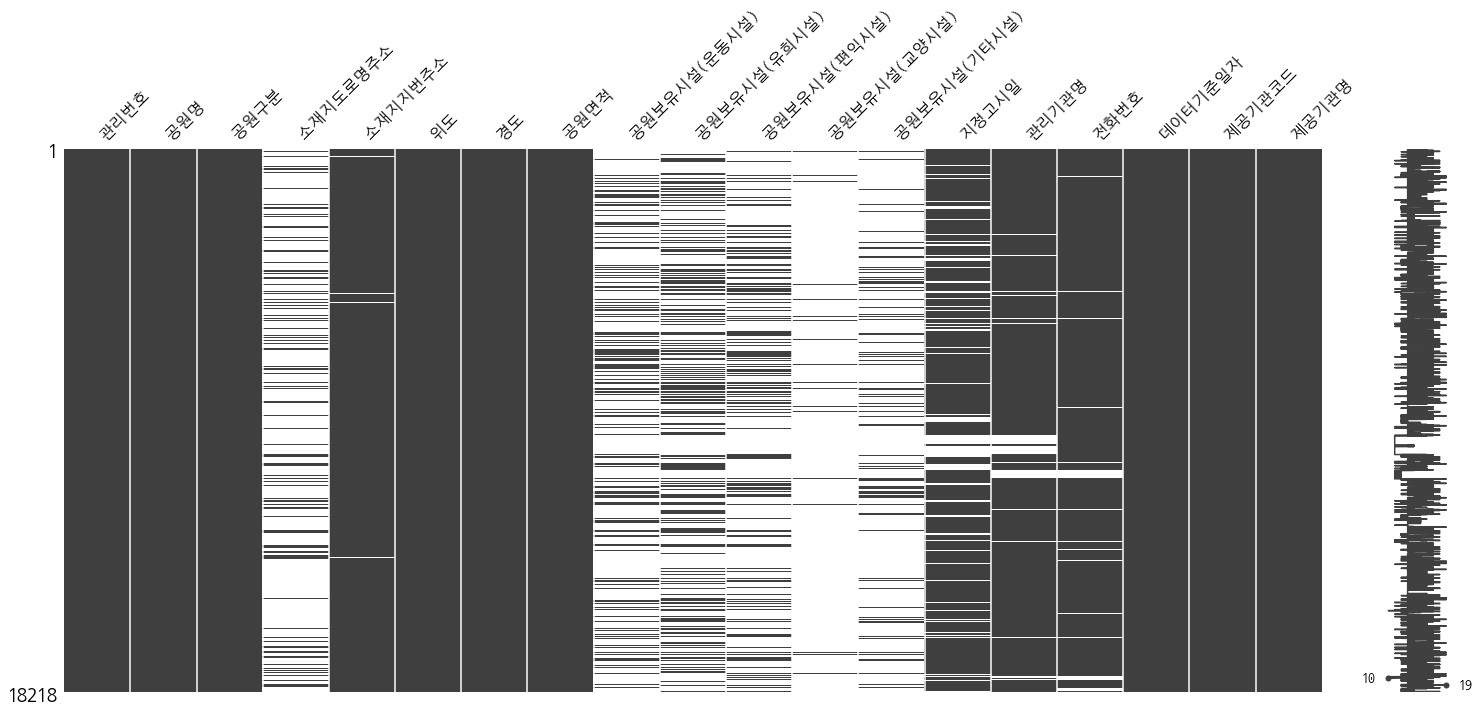

In [5]:
msno.matrix(park_202308)
plt.show()

In [6]:
park_202308.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [7]:
#drop 불필요한 컬럼 제거
park_202308.drop(columns=[ '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명'], inplace=True)
park_202308

관리번호             공원명   공원구분          소재지도로명주소  \
0      41390-00084            승지공원   근린공원  경기도 시흥시 능곡중앙로 85   
1      41570-00059  고촌어린이19(수기1공원)  어린이공원               NaN   
2      41570-00060  고촌어린이20(수기2공원)  어린이공원               NaN   
3      41570-00061  고촌어린이21(수기3공원)  어린이공원               NaN   
4      41570-00063          항공소공원1    소공원               NaN   
...            ...             ...    ...               ...   
18213  11500-00044             꿈돌이  어린이공원               NaN   
18214  11500-00045             소나무  어린이공원               NaN   
18215  11500-00046              산새  어린이공원               NaN   
18216  11500-00047              박장  어린이공원               NaN   
18217  11500-00048              참새  어린이공원               NaN   

                      소재지지번주소         위도          경도     공원면적          전화번호  \
0             경기도 시흥시 능곡동 552  37.371378  126.813132  10842.0  031-310-3869   
1        경기도 김포시 고촌읍 신곡리 1249  37.600127  126.767372   1715.0  031-980-5627   
2        경기도 김포시 고촌읍 신곡리 1260  37.596805  126.770145   1522.0  031-980-5627   
3        경기도 김포시 고촌읍 신곡리 1268  37.596252  126.767048   1567.0  031-980-5627   
4      경기도 김포시 대곶면 대벽리 산66-56  37.617583  126.580436   1968.0  031-980-2344   
...                       ...        ...         ...      ...           ...   
18213    서울특별시 강서구 화곡동 24-128  37.546097  126.845352   1507.0  02-2600-4202   
18214     서울특별시 강서구 화곡동 29-31  37.547058  126.847807    942.0  02-2600-4202   
18215       서울특별시 강서구 화곡동 772  37.546268  126.850385    539.0  02-2600-4202   
18216     서울특별시 강서구 화곡동 56-25  37.540768  126.849087    929.0  02-2600-4202   
18217    서울특별시 강서구 화곡동 56-638  37.539725  126.847003    256.0  02-2600-4202   

          데이터기준일자   제공기관코드      제공기관명  
0      2022-11-28  4010000    경기도 시흥시  
1      2022-10-18  4090000    경기도 김포시  
2      2022-10-18  4090000    경기도 김포시  
3      2022-10-18  4090000    경기도 김포시  
4      2022-10-18  4090000    경기도 김포시  
...           ...      ...        ...  
18213  2023-03-10  3150000  서울특별시 강서구  
18214  2023-03-10  3150000  서울특별시 강서구  
18215  2023-03-10  3150000  서울특별시 강서구  
18216  2023-03-10  3150000  서울특별시 강서구  
18217  2023-03-10  3150000  서울특별시 강서구  

[18218 rows x 12 columns]

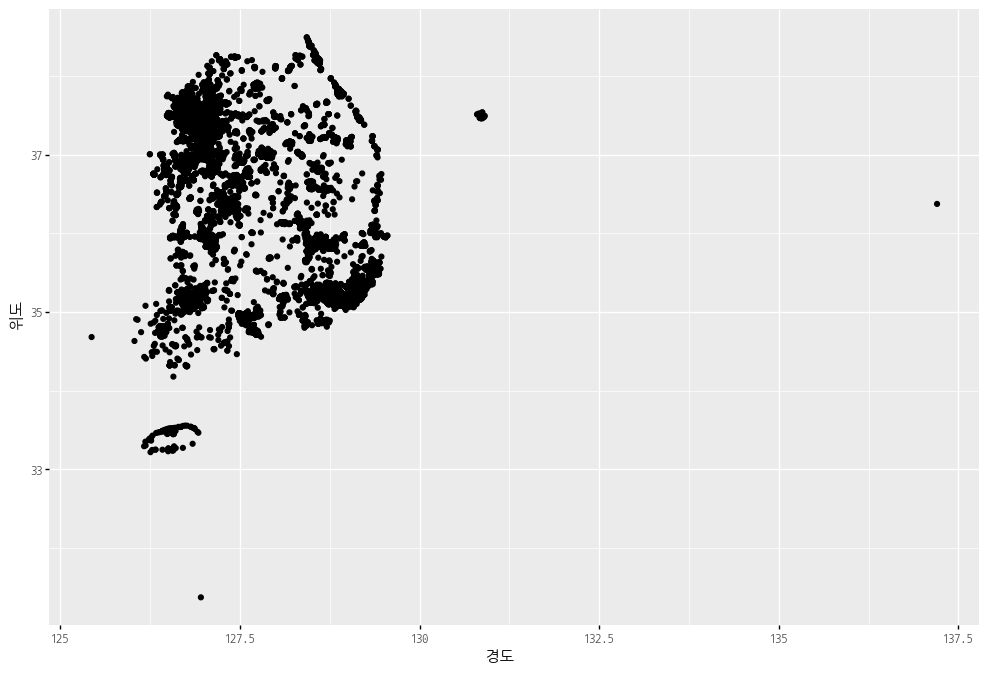

<ggplot: (106487644785)>

In [8]:
(
    ggplot(park_202308, aes('경도','위도'))
    +geom_point() # scatter
    +theme(text=element_text(family='NanumGothicCoding'), figure_size=(12,8)) # 한글 깨짐 방지
)

<AxesSubplot:xlabel='경도', ylabel='위도'>

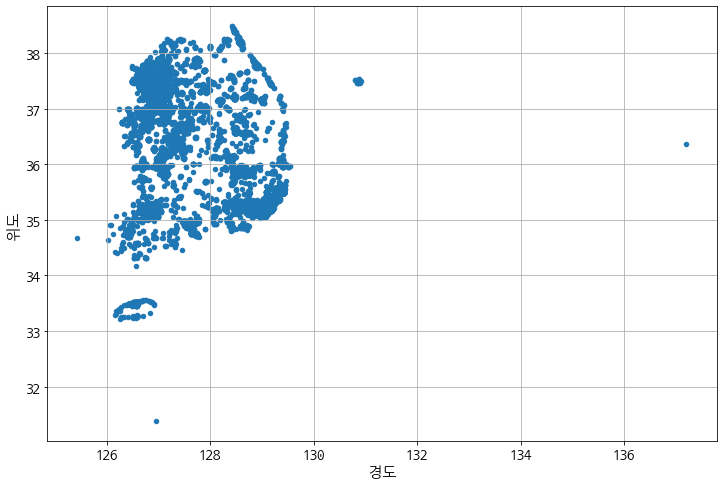

In [9]:
park_202308.plot.scatter(x='경도', y='위도', grid=True, figsize=(12,8)) # scatter

주소 데이터 전처리 => 도로명 주소가 NaN이면 지번 주소로 채운다.

In [10]:
# 도로명 주소가 NaN인 데이터의 개수 (지번 주소만 입력된 데이터의 개수)
park_202308.소재지도로명주소.isnull().sum() 

14559

In [11]:
# 도로명 주소 null & 지번 주소 not null 데이터
# 불린 인덱싱 작업시 & 또는 |이 사용되면 연산식 전체를 ()로 묶어준다.
# 연산식이 논리값이면 ()로 묶지 않아도 돼.

# park_202212[(park_202212['소재지도로명주소'].isnull() == True) & (park_202212['소재지지번주소'].notnull() == True)]
park_202308[park_202308['소재지도로명주소'].isnull() & park_202308.소재지지번주소.notnull()]

관리번호             공원명   공원구분 소재지도로명주소                 소재지지번주소  \
1      41570-00059  고촌어린이19(수기1공원)  어린이공원      NaN    경기도 김포시 고촌읍 신곡리 1249   
2      41570-00060  고촌어린이20(수기2공원)  어린이공원      NaN    경기도 김포시 고촌읍 신곡리 1260   
3      41570-00061  고촌어린이21(수기3공원)  어린이공원      NaN    경기도 김포시 고촌읍 신곡리 1268   
4      41570-00063          항공소공원1    소공원      NaN  경기도 김포시 대곶면 대벽리 산66-56   
5      41570-00064         걸포어린이22  어린이공원      NaN        경기도 김포시 걸포동 1560   
...            ...             ...    ...      ...                     ...   
18213  11500-00044             꿈돌이  어린이공원      NaN    서울특별시 강서구 화곡동 24-128   
18214  11500-00045             소나무  어린이공원      NaN     서울특별시 강서구 화곡동 29-31   
18215  11500-00046              산새  어린이공원      NaN       서울특별시 강서구 화곡동 772   
18216  11500-00047              박장  어린이공원      NaN     서울특별시 강서구 화곡동 56-25   
18217  11500-00048              참새  어린이공원      NaN    서울특별시 강서구 화곡동 56-638   

              위도          경도    공원면적          전화번호     데이터기준일자   제공기관코드  \
1      37.600127  126.767372  1715.0  031-980-5627  2022-10-18  4090000   
2      37.596805  126.770145  1522.0  031-980-5627  2022-10-18  4090000   
3      37.596252  126.767048  1567.0  031-980-5627  2022-10-18  4090000   
4      37.617583  126.580436  1968.0  031-980-2344  2022-10-18  4090000   
5      37.634949  126.705228  3450.0  031-980-5627  2022-10-18  4090000   
...          ...         ...     ...           ...         ...      ...   
18213  37.546097  126.845352  1507.0  02-2600-4202  2023-03-10  3150000   
18214  37.547058  126.847807   942.0  02-2600-4202  2023-03-10  3150000   
18215  37.546268  126.850385   539.0  02-2600-4202  2023-03-10  3150000   
18216  37.540768  126.849087   929.0  02-2600-4202  2023-03-10  3150000   
18217  37.539725  126.847003   256.0  02-2600-4202  2023-03-10  3150000   

           제공기관명  
1        경기도 김포시  
2        경기도 김포시  
3        경기도 김포시  
4        경기도 김포시  
5        경기도 김포시  
...          ...  
18213  서울특별시 강서구  
18214  서울특별시 강서구  
18215  서울특별시 강서구  
18216  서울특별시 강서구  
18217  서울특별시 강서구  

[14559 rows x 12 columns]

In [12]:
# 지번 주소가 NaN 
park_202308.소재지지번주소.isnull().sum()

163

In [13]:
# 도로명 주소만 있고 지번 주소가 nan
park_202308[park_202308['소재지지번주소'].isnull() & park_202308.소재지도로명주소.notnull()]

관리번호        공원명   공원구분                  소재지도로명주소 소재지지번주소  \
273    46150-00101       78공원  어린이공원      전라남도 순천시 해룡면 큰산두길 13     NaN   
276    46150-00104  장대공원(B지구)   근린공원    전라남도 순천시 율전2길 148(조곡동)     NaN   
277    46150-00105     제3수변공원   수변공원   전라남도 순천시 자경1길 62-4(조곡동)     NaN   
278    46150-00106     제4수변공원   수변공원  전라남도 순천시 자경1길 62-16(조곡동)     NaN   
281    46150-00109     제7수변공원   수변공원    전라남도 순천시 용당신흥길 30(용당동)     NaN   
...            ...        ...    ...                       ...     ...   
17530  11620-00020         백설  어린이공원        서울특별시 관악구 관악로6길 50     NaN   
17534  11620-00024     신림근린공원   근린공원    서울특별시 관악구 남부순환로152길 53     NaN   
17536  11620-00026         문성  어린이공원     서울특별시 관악구 시흥대로164길 27     NaN   
17538  11620-00043         선봉  어린이공원       서울특별시 관악구 봉천로27길 20     NaN   
17540  11620-00045         중앙  어린이공원       서울특별시 관악구 봉천로41길 35     NaN   

              위도          경도     공원면적          전화번호     데이터기준일자   제공기관코드  \
273    34.931594  127.573242   4887.0  061-749-6330  2021-09-01  4820000   
276    34.951615  127.495608  31490.0  061-749-6330  2021-09-01  4820000   
277    34.954202  127.500688  15980.0  061-749-6330  2021-09-01  4820000   
278    34.954174  127.501041   9500.0  061-749-6330  2021-09-01  4820000   
281    34.969727  127.489997  28570.0  061-749-6330  2021-09-01  4820000   
...          ...         ...      ...           ...         ...      ...   
17530  37.476236  126.953512   1655.0   02-879-6504  2022-10-15  3200000   
17534  37.480884  126.918234  90960.0   02-879-6503  2022-10-15  3200000   
17536  37.482015  126.902891    988.0   02-879-6504  2022-10-15  3200000   
17538  37.485144  126.939678   1021.0   02-879-6504  2022-10-15  3200000   
17540  37.484446  126.948278    977.0   02-879-6504  2022-10-15  3200000   

           제공기관명  
273     전라남도 순천시  
276     전라남도 순천시  
277     전라남도 순천시  
278     전라남도 순천시  
281     전라남도 순천시  
...          ...  
17530  서울특별시 관악구  
17534  서울특별시 관악구  
17536  서울특별시 관악구  
17538  서울특별시 관악구  
17540  서울특별시 관악구  

[163 rows x 12 columns]

In [14]:
# 도로명 주소 and 지번 주소 모두 o
park_202308[park_202308['소재지지번주소'].notnull() & park_202308.소재지도로명주소.notnull()]

관리번호        공원명   공원구분                  소재지도로명주소  \
0      41390-00084       승지공원   근린공원          경기도 시흥시 능곡중앙로 85   
14     41830-00020     강하 소공원    소공원        경기도 양평군 강하면 운심길 58   
17     41830-00023  오빈14호 소공원    소공원   경기도 양평군 양평읍 오빈1리길12번길 4   
18     41830-00024  오빈15호 소공원    소공원       경기도 양평군 양평읍 오빈1리길 9   
54     27290-00154    은행어린이공원  어린이공원    대구광역시 달서구 월곡로20길 15-16   
...            ...        ...    ...                       ...   
18114  31110-10005      새이골공원   근린공원  울산광역시 중구 달빛로 65-23 (약사동)   
18156  42730-00024  안흥어린이공원3호  어린이공원      강원도 횡성군 안흥면 안흥동4길 28   
18175  48129-00031      석동2공원   근린공원       경상남도 창원시 진해구 석동로 66   
18178  48129-00033      어린이공원  어린이공원  경상남도 창원시 진해구 냉천로129번길 17   
18192  50130-00001      월라봉공원   근린공원   제주특별자치도 서귀포시 월라봉로 76-40   

                       소재지지번주소         위도          경도      공원면적          전화번호  \
0              경기도 시흥시 능곡동 552  37.371378  126.813132   10842.0  031-310-3869   
14        경기도 양평군 강하면 운심리 28-1  37.496164  127.412326     394.0  031-770-2358   
17       경기도 양평군 양평읍 오빈리 88-46  37.507148  127.479103     404.0  031-770-2358   
18       경기도 양평군 양평읍 오빈리 81-32  37.506986  127.479677     293.0  031-770-2358   
54          대구광역시 달서구 상인동 1589  35.806720  128.551337    1976.4  053-667-3636   
...                        ...        ...         ...       ...           ...   
18114       울산광역시 중구 약사동 327-6  35.582211  129.333904  184653.6  052-290-4420   
18156    강원도 횡성군 안흥면 안흥리 36-57  37.408713  128.158347    1510.0  033-340-2472   
18175      경상남도 창원시 진해구 석동 657  35.155208  128.706573   10046.6  055-548-4501   
18178      경상남도 창원시 진해구 석동 661  35.155642  128.709718    1649.6  055-548-4501   
18192  제주특별자치도 서귀포시 신효동 1192-5  33.270519  126.604565  285946.0  064-760-3192   

          데이터기준일자   제공기관코드         제공기관명  
0      2022-11-28  4010000       경기도 시흥시  
14     2023-05-26  4170000       경기도 양평군  
17     2023-05-26  4170000       경기도 양평군  
18     2023-05-26  4170000       경기도 양평군  
54     2022-10-19  3470000     대구광역시 달서구  
...           ...      ...           ...  
18114  2022-11-18  3690000      울산광역시 중구  
18156  2021-12-22  4260000       강원도 횡성군  
18175  2022-12-01  5670000      경상남도 창원시  
18178  2022-12-01  5670000      경상남도 창원시  
18192  2022-12-15  6520000  제주특별자치도 서귀포시  

[3496 rows x 12 columns]

In [15]:
# 도로명 주소 and 지번 주소 모두 x => 없다. 굳~
park_202308[park_202308['소재지지번주소'].isnull() & park_202308.소재지도로명주소.isnull()]

Empty DataFrame
Columns: [관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명]
Index: []

In [16]:
# 도로명 주소에 입력된 -를 누락값으로 변환
park_202308[park_202308.소재지도로명주소=='-'] # - 개많음.

관리번호              공원명   공원구분 소재지도로명주소                   소재지지번주소  \
4237   47850-00045             송림공원   수변공원        -      경상북도 칠곡군 동명면 구덕리 415   
13819  47850-00033           삼청제1공원  어린이공원        -    경상북도 칠곡군 왜관읍 삼청리 477-7   
13820  47850-00034        왜관제4어린이공원  어린이공원        -     경상북도 칠곡군 왜관읍 왜관리 1449   
13821  47850-00035            왜관소공원    소공원        -     경상북도 칠곡군 왜관읍 왜관리 1542   
13822  47850-00036           아곡1소공원    소공원        -      경상북도 칠곡군 왜관읍 아곡리 829   
13823  47850-00037           아곡2소공원    소공원        -      경상북도 칠곡군 왜관읍 아곡리 816   
13824  47850-00038        연화공원(소공원)    소공원        -     경상북도 칠곡군 지천면 연화리 1035   
13825  47850-00039             한실공원   근린공원        -     경상북도 칠곡군 왜관읍 삼청리 1100   
13826  47850-00040       왜관3공단-1호공원   체육공원        -     경상북도 칠곡군 왜관읍 낙산리 1027   
13827  47850-00041       왜관3공단-2호공원    소공원        -     경상북도 칠곡군 왜관읍 낙산리 1115   
13828  47850-00042       왜관3공단-3호공원    소공원        -     경상북도 칠곡군 왜관읍 낙산리 1066   
13829  47850-00043       왜관3공단-4호공원   근린공원        -   경상북도 칠곡군 왜관읍 낙산리 1162-2   
13830  47850-00044         중리3공단소공원    소공원        -     경상북도 칠곡군 석적읍 중리 443-9   
13831  47850-00021   중리제5공원(테니스장공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 247-3   
13832  47850-00022    중리제6공원(배수지공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 263-2   
13833  47850-00023           남율제1공원  어린이공원        -      경상북도 칠곡군 석적읍 남율리 143   
13834  47850-00024           남율제2공원  어린이공원        -      경상북도 칠곡군 석적읍 남율리 산38   
13835  47850-00025           남율제3공원  어린이공원        -      경상북도 칠곡군 석적읍 남율리 235   
13836  47850-00026           남율제4공원  어린이공원        -  경상북도 칠곡군 석적읍 남율리 산 45-13   
13837  47850-00027           남율제5공원  어린이공원        -  경상북도 칠곡군 석적읍 남율리 산 44-20   
13838  47850-00028   중리제7공원(장승백이공원)  어린이공원        -    경상북도 칠곡군 석적읍 중리 161-16   
13839  47850-00029    중리제8공원(신맞이공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 172-3   
13840  47850-00030     중리제9공원(큰골공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 170-6   
13841  47850-00031             낙산공원   근린공원        -    경상북도 칠곡군 왜관읍 낙산리 690-1   
13857  47850-00001             동락공원   근린공원        -     경상북도 칠곡군 석적읍 중리 495-5   
13858  47850-00002    인평제2공원(한마음공원)  어린이공원        -    경상북도 칠곡군 북삼읍 인평리 705-3   
13859  47850-00003     인평제3공원(허브공원)  어린이공원        -     경상북도 칠곡군 북삼읍 숭오리 15-1   
13861  47850-00005   인평제5공원(해오름1공원)  어린이공원        -     경상북도 칠곡군 북삼읍 인평리 1087   
13864  47850-00008     인평제7공원(나눔공원)  어린이공원        -   경상북도 칠곡군 북삼읍 인평리 1073-1   
13865  47850-00009     인평제8공원(하늘공원)  어린이공원        -   경상북도 칠곡군 북삼읍 인평리 1074-1   
13866  47850-00010         삼청리어린이공원  어린이공원        -   경상북도 칠곡군 왜관읍 삼청리 410-23   
13867  47850-00011    인평제9공원(늘푸른공원)  어린이공원        -    경상북도 칠곡군 북삼읍 인평리 271-2   
13868  47850-00012   인평제10공원(다모아공원)  어린이공원        -    경상북도 칠곡군 북삼읍 숭오리 26-10   
13869  47850-00013    인평제11공원(두리공원)  어린이공원        -     경상북도 칠곡군 북삼읍 숭오리 21-8   
13870  47850-00014   인평제12공원(은하수공원)  어린이공원        -    경상북도 칠곡군 북삼읍 인평리 671-1   
13872  47850-00016  인평제14공원(해오름2공원)  어린이공원        -     경상북도 칠곡군 북삼읍 인평리 1033   
13873  47850-00017     중리제1공원(섬계공원)  어린이공원        -       경상북도 칠곡군 석적읍 중리 187   
13874  47850-00018     중리제2공원(광암공원)  어린이공원        -       경상북도 칠곡군 석적읍 중리 211   
13875  47850-00019   중리제3공원(화산서당공원)  어린이공원        -       경상북도 칠곡군 석적읍 중리 230   
13876  47850-00020  중리제4공원(게이트볼장공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 238-4   

              위도          경도      공원면적          전화번호     데이터기준일자   제공기관코드  \
4237   35.983928  128.567842  494957.0  054-979-5390  2020-07-16  5220000   
13819  35.983819  128.425973     900.0  054-979-6832  2020-07-16  5220000   
13820  35.978114  128.400493    2330.0  054-979-6832  2020-07-16  5220000   
13821  35.975735  128.399525    2330.0  054-979-6832  2020-07-16  5220000   
13822  36.010701  128.430388    1573.0  054-979-6832  2020-07-16  5220000   
13823  36.006775  128.432897    1491.0  054-979-6832  2020-07-16  5220000   
13824  35.953046  128.457239     666.0  054-979-6832  2020-07-16  5220000   
13825  35.970680  128.429810   23641.0  054-979-6832  2020-07-16  5220000   

In [17]:
# 중요 ! 
# 소재지도로명주소=='-'인 인덱스와, 그 열을 loc로 찾아  np.NaN 으로 변환
park_202308.loc[park_202308.소재지도로명주소=='-', '소재지도로명주소'] = np.NaN 

In [18]:
park_202308[park_202308.소재지도로명주소=='-'] # 깰끔

Empty DataFrame
Columns: [관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명]
Index: []

In [19]:
park_202308[park_202308.제공기관명=='경상북도 칠곡군'] # 결과 확인 ㅇㅇ

관리번호              공원명   공원구분                  소재지도로명주소  \
4237   47850-00045             송림공원   수변공원                       NaN   
13818  47850-00032             왜관공원  어린이공원      경상북도 칠곡군 왜관읍 중앙로 266   
13819  47850-00033           삼청제1공원  어린이공원                       NaN   
13820  47850-00034        왜관제4어린이공원  어린이공원                       NaN   
13821  47850-00035            왜관소공원    소공원                       NaN   
13822  47850-00036           아곡1소공원    소공원                       NaN   
13823  47850-00037           아곡2소공원    소공원                       NaN   
13824  47850-00038        연화공원(소공원)    소공원                       NaN   
13825  47850-00039             한실공원   근린공원                       NaN   
13826  47850-00040       왜관3공단-1호공원   체육공원                       NaN   
13827  47850-00041       왜관3공단-2호공원    소공원                       NaN   
13828  47850-00042       왜관3공단-3호공원    소공원                       NaN   
13829  47850-00043       왜관3공단-4호공원   근린공원                       NaN   
13830  47850-00044         중리3공단소공원    소공원                       NaN   
13831  47850-00021   중리제5공원(테니스장공원)  어린이공원                       NaN   
13832  47850-00022    중리제6공원(배수지공원)  어린이공원                       NaN   
13833  47850-00023           남율제1공원  어린이공원                       NaN   
13834  47850-00024           남율제2공원  어린이공원                       NaN   
13835  47850-00025           남율제3공원  어린이공원                       NaN   
13836  47850-00026           남율제4공원  어린이공원                       NaN   
13837  47850-00027           남율제5공원  어린이공원                       NaN   
13838  47850-00028   중리제7공원(장승백이공원)  어린이공원                       NaN   
13839  47850-00029    중리제8공원(신맞이공원)  어린이공원                       NaN   
13840  47850-00030     중리제9공원(큰골공원)  어린이공원                       NaN   
13841  47850-00031             낙산공원   근린공원                       NaN   
13857  47850-00001             동락공원   근린공원                       NaN   
13858  47850-00002    인평제2공원(한마음공원)  어린이공원                       NaN   
13859  47850-00003     인평제3공원(허브공원)  어린이공원                       NaN   
13860  47850-00004   인평제4공원(그루터기공원)  어린이공원                       NaN   
13861  47850-00005   인평제5공원(해오름1공원)  어린이공원                       NaN   
13862  47850-00006     인평제2공원(체육공원)   근린공원       경상북도 칠곡군 북삼읍 북삼로 65   
13863  47850-00007             금산공원   근린공원  경상북도 칠곡군 왜관읍 공단로4길 18-26   
13864  47850-00008     인평제7공원(나눔공원)  어린이공원                       NaN   
13865  47850-00009     인평제8공원(하늘공원)  어린이공원                       NaN   
13866  47850-00010         삼청리어린이공원  어린이공원                       NaN   
13867  47850-00011    인평제9공원(늘푸른공원)  어린이공원                       NaN   
13868  47850-00012   인평제10공원(다모아공원)  어린이공원                       NaN   
13869  47850-00013    인평제11공원(두리공원)  어린이공원                       NaN   
13870  47850-00014   인평제12공원(은하수공원)  어린이공원                       NaN   
13871  47850-00015    인평제13공원(초록공원)  어린이공원                       NaN   
13872  47850-00016  인평제14공원(해오름2공원)  어린이공원                       NaN   
13873  47850-00017     중리제1공원(섬계공원)  어린이공원                       NaN   
13874  47850-00018     중리제2공원(광암공원)  어린이공원                       NaN   
13875  47850-00019   중리제3공원(화산서당공원)  어린이공원                       NaN   
13876  47850-00020  중리제4공원(게이트볼장공원)  어린이공원                       NaN   

                        소재지지번주소         위도          경도      공원면적  \
4237       경상북도 칠곡군 동명면 구덕리 415  35.983928  128.567842  494957.0   
13818      경상북도 칠곡군 왜관읍 석전리 792  35.998615  128.398044    7695.0   
13819    경상북도 칠곡군 왜관읍 삼청리 477-7  35.983819  128.425973     900.0   
13820     경상북도 칠곡군 왜관읍 왜관리 1449  35.978114  128.400493    2330.0   
13821     경상북도 칠곡군 왜관읍 왜관리 1542  35.975735  128.399525    2330.0   
13822      경상북도 칠곡군 왜관읍 아곡리 829  36.010701  128.430388    1573.0   
13823      경상북도 칠곡군 왜관읍 아곡리 816  36.006775  128.432897    1491.0   
13824     경상북도 칠곡군 지천면 연화리 1035  35.953046  128.457239     666.0   
13825     경상북도 칠곡군 왜관읍 삼청리 1100  35.970680  128.429810   23641.0   
13826     경상북도 칠곡군 왜관

In [20]:
# 도로명 주소가 NaN인 데이터를 지번 주소로 채운다.
# fillna(뭘로 채울지)
park_202308.소재지도로명주소.fillna(park_202308.소재지지번주소, inplace=True)

park_202308.소재지도로명주소.isnull().sum() # 깰끔

0

In [21]:
park_202308[park_202308.소재지도로명주소.isnull()]

Empty DataFrame
Columns: [관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명]
Index: []

In [22]:
park_202308[park_202308.제공기관코드=='5220000'] # 결과 확인2. 숫자 아니라 문자임

관리번호              공원명   공원구분                  소재지도로명주소  \
4237   47850-00045             송림공원   수변공원      경상북도 칠곡군 동명면 구덕리 415   
13818  47850-00032             왜관공원  어린이공원      경상북도 칠곡군 왜관읍 중앙로 266   
13819  47850-00033           삼청제1공원  어린이공원    경상북도 칠곡군 왜관읍 삼청리 477-7   
13820  47850-00034        왜관제4어린이공원  어린이공원     경상북도 칠곡군 왜관읍 왜관리 1449   
13821  47850-00035            왜관소공원    소공원     경상북도 칠곡군 왜관읍 왜관리 1542   
13822  47850-00036           아곡1소공원    소공원      경상북도 칠곡군 왜관읍 아곡리 829   
13823  47850-00037           아곡2소공원    소공원      경상북도 칠곡군 왜관읍 아곡리 816   
13824  47850-00038        연화공원(소공원)    소공원     경상북도 칠곡군 지천면 연화리 1035   
13825  47850-00039             한실공원   근린공원     경상북도 칠곡군 왜관읍 삼청리 1100   
13826  47850-00040       왜관3공단-1호공원   체육공원     경상북도 칠곡군 왜관읍 낙산리 1027   
13827  47850-00041       왜관3공단-2호공원    소공원     경상북도 칠곡군 왜관읍 낙산리 1115   
13828  47850-00042       왜관3공단-3호공원    소공원     경상북도 칠곡군 왜관읍 낙산리 1066   
13829  47850-00043       왜관3공단-4호공원   근린공원   경상북도 칠곡군 왜관읍 낙산리 1162-2   
13830  47850-00044         중리3공단소공원    소공원     경상북도 칠곡군 석적읍 중리 443-9   
13831  47850-00021   중리제5공원(테니스장공원)  어린이공원     경상북도 칠곡군 석적읍 중리 247-3   
13832  47850-00022    중리제6공원(배수지공원)  어린이공원     경상북도 칠곡군 석적읍 중리 263-2   
13833  47850-00023           남율제1공원  어린이공원      경상북도 칠곡군 석적읍 남율리 143   
13834  47850-00024           남율제2공원  어린이공원      경상북도 칠곡군 석적읍 남율리 산38   
13835  47850-00025           남율제3공원  어린이공원      경상북도 칠곡군 석적읍 남율리 235   
13836  47850-00026           남율제4공원  어린이공원  경상북도 칠곡군 석적읍 남율리 산 45-13   
13837  47850-00027           남율제5공원  어린이공원  경상북도 칠곡군 석적읍 남율리 산 44-20   
13838  47850-00028   중리제7공원(장승백이공원)  어린이공원    경상북도 칠곡군 석적읍 중리 161-16   
13839  47850-00029    중리제8공원(신맞이공원)  어린이공원     경상북도 칠곡군 석적읍 중리 172-3   
13840  47850-00030     중리제9공원(큰골공원)  어린이공원     경상북도 칠곡군 석적읍 중리 170-6   
13841  47850-00031             낙산공원   근린공원    경상북도 칠곡군 왜관읍 낙산리 690-1   
13857  47850-00001             동락공원   근린공원     경상북도 칠곡군 석적읍 중리 495-5   
13858  47850-00002    인평제2공원(한마음공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 705-3   
13859  47850-00003     인평제3공원(허브공원)  어린이공원     경상북도 칠곡군 북삼읍 숭오리 15-1   
13860  47850-00004   인평제4공원(그루터기공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 676-1   
13861  47850-00005   인평제5공원(해오름1공원)  어린이공원     경상북도 칠곡군 북삼읍 인평리 1087   
13862  47850-00006     인평제2공원(체육공원)   근린공원       경상북도 칠곡군 북삼읍 북삼로 65   
13863  47850-00007             금산공원   근린공원  경상북도 칠곡군 왜관읍 공단로4길 18-26   
13864  47850-00008     인평제7공원(나눔공원)  어린이공원   경상북도 칠곡군 북삼읍 인평리 1073-1   
13865  47850-00009     인평제8공원(하늘공원)  어린이공원   경상북도 칠곡군 북삼읍 인평리 1074-1   
13866  47850-00010         삼청리어린이공원  어린이공원   경상북도 칠곡군 왜관읍 삼청리 410-23   
13867  47850-00011    인평제9공원(늘푸른공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 271-2   
13868  47850-00012   인평제10공원(다모아공원)  어린이공원    경상북도 칠곡군 북삼읍 숭오리 26-10   
13869  47850-00013    인평제11공원(두리공원)  어린이공원     경상북도 칠곡군 북삼읍 숭오리 21-8   
13870  47850-00014   인평제12공원(은하수공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 671-1   
13871  47850-00015    인평제13공원(초록공원)  어린이공원     경상북도 칠곡군 북삼읍 인평리 1025   
13872  47850-00016  인평제14공원(해오름2공원)  어린이공원     경상북도 칠곡군 북삼읍 인평리 1033   
13873  47850-00017     중리제1공원(섬계공원)  어린이공원       경상북도 칠곡군 석적읍 중리 187   
13874  47850-00018     중리제2공원(광암공원)  어린이공원       경상북도 칠곡군 석적읍 중리 211   
13875  47850-00019   중리제3공원(화산서당공원)  어린이공원       경상북도 칠곡군 석적읍 중리 230   
13876  47850-00020  중리제4공원(게이트볼장공원)  어린이공원     경상북도 칠곡군 석적읍 중리 238-4   

                        소재지지번주소         위도          경도      공원면적  \
4237       경상북도 칠곡군 동명면 구덕리 415  35.983928  128.567842  494957.0   
13818      경상북도 칠곡군 왜관읍 석전리 792  35.998615  128.398044    7695.0   
13819    경상북도 칠곡군 왜관읍 삼청리 477-7  35.983819  128.425973     900.0   
13820     경상북도 칠곡군 왜관읍 왜관리 1449  35.978114  128.400493    2330.0   
13821     경상북도 칠곡군 왜관읍 왜관리 1542  35.975735  128.399525    2330.0   
13822      경상북도 칠곡군 왜관읍 아곡리 829  36.010701  128.430388    1573.0   
13823      경상북도 칠곡군 왜관읍 아곡리 816  36.006775  128.432897    1491.0   
13824     경상북도 칠곡군 지천면 연화리 1035  35.953046  128.457239     666.0   
13825     경상북도 칠곡군 왜관읍 삼청리 1100  35.970680  128.429810   23641.0   
13826     경상북도 칠곡군 왜관

============================ 주소 널값 전처리끝 ============================

In [23]:
# '공원면적'으로 CircleMarker를 표시하기 위해선 좀 작아야 한다. 적당한 수식으로 줄여 '공원면적비율' 열을 만든다.
# 시리즈.apply(lambda 변수: 수식)
# 시리즈에 저장된 데이터가 lambda 뒤의 변수로 한 건씩 전달되고 ':' 다음의 수식을 실행한 후 apply() 함수에 의해서 
park_202308['공원면적비율'] = park_202308.공원면적.apply(lambda x : np.sqrt(x)*0.01)
park_202308

관리번호             공원명   공원구분                소재지도로명주소  \
0      41390-00084            승지공원   근린공원        경기도 시흥시 능곡중앙로 85   
1      41570-00059  고촌어린이19(수기1공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1249   
2      41570-00060  고촌어린이20(수기2공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1260   
3      41570-00061  고촌어린이21(수기3공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1268   
4      41570-00063          항공소공원1    소공원  경기도 김포시 대곶면 대벽리 산66-56   
...            ...             ...    ...                     ...   
18213  11500-00044             꿈돌이  어린이공원    서울특별시 강서구 화곡동 24-128   
18214  11500-00045             소나무  어린이공원     서울특별시 강서구 화곡동 29-31   
18215  11500-00046              산새  어린이공원       서울특별시 강서구 화곡동 772   
18216  11500-00047              박장  어린이공원     서울특별시 강서구 화곡동 56-25   
18217  11500-00048              참새  어린이공원    서울특별시 강서구 화곡동 56-638   

                      소재지지번주소         위도          경도     공원면적          전화번호  \
0             경기도 시흥시 능곡동 552  37.371378  126.813132  10842.0  031-310-3869   
1        경기도 김포시 고촌읍 신곡리 1249  37.600127  126.767372   1715.0  031-980-5627   
2        경기도 김포시 고촌읍 신곡리 1260  37.596805  126.770145   1522.0  031-980-5627   
3        경기도 김포시 고촌읍 신곡리 1268  37.596252  126.767048   1567.0  031-980-5627   
4      경기도 김포시 대곶면 대벽리 산66-56  37.617583  126.580436   1968.0  031-980-2344   
...                       ...        ...         ...      ...           ...   
18213    서울특별시 강서구 화곡동 24-128  37.546097  126.845352   1507.0  02-2600-4202   
18214     서울특별시 강서구 화곡동 29-31  37.547058  126.847807    942.0  02-2600-4202   
18215       서울특별시 강서구 화곡동 772  37.546268  126.850385    539.0  02-2600-4202   
18216     서울특별시 강서구 화곡동 56-25  37.540768  126.849087    929.0  02-2600-4202   
18217    서울특별시 강서구 화곡동 56-638  37.539725  126.847003    256.0  02-2600-4202   

          데이터기준일자   제공기관코드      제공기관명    공원면적비율  
0      2022-11-28  4010000    경기도 시흥시  1.041249  
1      2022-10-18  4090000    경기도 김포시  0.414126  
2      2022-10-18  4090000    경기도 김포시  0.390128  
3      2022-10-18  4090000    경기도 김포시  0.395854  
4      2022-10-18  4090000    경기도 김포시  0.443621  
...           ...      ...        ...       ...  
18213  2023-03-10  3150000  서울특별시 강서구  0.388201  
18214  2023-03-10  3150000  서울특별시 강서구  0.306920  
18215  2023-03-10  3150000  서울특별시 강서구  0.232164  
18216  2023-03-10  3150000  서울특별시 강서구  0.304795  
18217  2023-03-10  3150000  서울특별시 강서구  0.160000  

[18218 rows x 13 columns]

주소 데이터 전처리

도로명 주소를 공백을 경계로 split해 4개의 시리즈를 추가한다

In [24]:
# split(expand=True) : 구분자로 분리시킨 결과로 df 만듦.
park_202308.소재지도로명주소.str.split(' ', expand=True)

0    1      2       3       4     5     6     7     8
0        경기도  시흥시  능곡중앙로      85    None  None  None  None  None
1        경기도  김포시    고촌읍     신곡리    1249  None  None  None  None
2        경기도  김포시    고촌읍     신곡리    1260  None  None  None  None
3        경기도  김포시    고촌읍     신곡리    1268  None  None  None  None
4        경기도  김포시    대곶면     대벽리  산66-56  None  None  None  None
...      ...  ...    ...     ...     ...   ...   ...   ...   ...
18213  서울특별시  강서구    화곡동  24-128    None  None  None  None  None
18214  서울특별시  강서구    화곡동   29-31    None  None  None  None  None
18215  서울특별시  강서구    화곡동     772    None  None  None  None  None
18216  서울특별시  강서구    화곡동   56-25    None  None  None  None  None
18217  서울특별시  강서구    화곡동  56-638    None  None  None  None  None

[18218 rows x 9 columns]

In [25]:
# 도로명 주소에서 공백으로 분리한 주소를 4번째 레벨까지 추가한다.
park_202308['주소1'] = park_202308.소재지도로명주소.str.split(' ', expand=True)[0]
park_202308['주소2'] = park_202308['소재지도로명주소'].str.split(' ', expand=True)[1]
park_202308['주소3'] = park_202308['소재지도로명주소'].str.split(' ', expand=True)[2]
park_202308['주소4'] = park_202308['소재지도로명주소'].str.split(' ', expand=True)[3]


park_202308.head()

관리번호             공원명   공원구분                소재지도로명주소  \
0  41390-00084            승지공원   근린공원        경기도 시흥시 능곡중앙로 85   
1  41570-00059  고촌어린이19(수기1공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1249   
2  41570-00060  고촌어린이20(수기2공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1260   
3  41570-00061  고촌어린이21(수기3공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1268   
4  41570-00063          항공소공원1    소공원  경기도 김포시 대곶면 대벽리 산66-56   

                  소재지지번주소         위도          경도     공원면적          전화번호  \
0         경기도 시흥시 능곡동 552  37.371378  126.813132  10842.0  031-310-3869   
1    경기도 김포시 고촌읍 신곡리 1249  37.600127  126.767372   1715.0  031-980-5627   
2    경기도 김포시 고촌읍 신곡리 1260  37.596805  126.770145   1522.0  031-980-5627   
3    경기도 김포시 고촌읍 신곡리 1268  37.596252  126.767048   1567.0  031-980-5627   
4  경기도 김포시 대곶면 대벽리 산66-56  37.617583  126.580436   1968.0  031-980-2344   

      데이터기준일자   제공기관코드    제공기관명    공원면적비율  주소1  주소2    주소3  주소4  
0  2022-11-28  4010000  경기도 시흥시  1.041249  경기도  시흥시  능곡중앙로   85  
1  2022-10-18  4090000  경기도 김포시  0.414126  경기도  김포시    고촌읍  신곡리  
2  2022-10-18  4090000  경기도 김포시  0.390128  경기도  김포시    고촌읍  신곡리  
3  2022-10-18  4090000  경기도 김포시  0.395854  경기도  김포시    고촌읍  신곡리  
4  2022-10-18  4090000  경기도 김포시  0.443621  경기도  김포시    대곶면  대벽리

============================ 주소 전처리끝2 ============================

위도, 경도 전처리 => 대한민국 범위를 벗어난 or 입력되지 않은 위도와 경도를 처리한다.



In [26]:
# describe : 각종 통계량 요약 
park_202308[['위도','경도']].describe() # 위도, 경도 열을 찾아 describe

위도            경도
count  18216.000000  18216.000000
mean      36.547172    127.485003
std        1.041114      0.848186
min       31.373336    125.433011
25%       35.594268    126.872521
50%       36.824662    127.105409
75%       37.467922    128.143350
max       38.491555    137.202661

In [27]:
#  대한민국 범위를 벗어난 데이터 추출
park_202308_error1 = park_202308[(park_202308.위도<32) | (park_202308.경도>132)]
park_202308_error1

관리번호          공원명  공원구분                  소재지도로명주소  \
16456  43113-00080  근린공원5(만수공원)  근린공원  충청북도 청주시 흥덕구 오송읍 만수리 512   
16523  41173-00113      제24호소공원   소공원      경기도 안양시 동안구 호계동 1308   

                        소재지지번주소         위도          경도     공원면적  \
16456  충청북도 청주시 흥덕구 오송읍 만수리 512  36.374204  137.202661  33258.0   
16523      경기도 안양시 동안구 호계동 1308  31.373336  126.954253   2159.0   

                전화번호     데이터기준일자   제공기관코드     제공기관명    공원면적비율   주소1  주소2  주소3  \
16456   043-201-4433  2020-07-16  5710000  충청북도 청주시  1.823678  충청북도  청주시  흥덕구   
16523  031-8045-5022  2022-11-15  3830000   경기도 안양시  0.464650   경기도  안양시  동안구   

       주소4  
16456  오송읍  
16523  호계동

In [28]:
# 위도 경도 isnull
park_202308_error2= park_202308[park_202308.위도.isnull() | park_202308.경도.isnull()]
park_202308_error2

관리번호           공원명   공원구분               소재지도로명주소  \
7882  44770-25321  (신청사)어린이공원 2  어린이공원  충청남도 서천군 서천읍 군사리 60-5   
7884  44770-25321     (신청사) 소공원    소공원  충청남도 서천군 서천읍 군사리 51-8   

                    소재지지번주소  위도  경도    공원면적          전화번호     데이터기준일자  \
7882  충청남도 서천군 서천읍 군사리 60-5 NaN NaN  1692.0  041-950-4438  2021-07-10   
7884  충청남도 서천군 서천읍 군사리 51-8 NaN NaN  5189.0  041-950-4438  2021-07-10   

       제공기관코드     제공기관명    공원면적비율   주소1  주소2  주소3  주소4  
7882  4580000  충청남도 서천군  0.411339  충청남도  서천군  서천읍  군사리  
7884  4580000  충청남도 서천군  0.720347  충청남도  서천군  서천읍  군사리

In [29]:
# 위도 경도 올바른 데이터만 추출
park_202308_ok =  park_202308[(park_202308.위도>=32) & (park_202308.경도<=132)]
park_202308_ok

관리번호             공원명   공원구분                소재지도로명주소  \
0      41390-00084            승지공원   근린공원        경기도 시흥시 능곡중앙로 85   
1      41570-00059  고촌어린이19(수기1공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1249   
2      41570-00060  고촌어린이20(수기2공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1260   
3      41570-00061  고촌어린이21(수기3공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1268   
4      41570-00063          항공소공원1    소공원  경기도 김포시 대곶면 대벽리 산66-56   
...            ...             ...    ...                     ...   
18213  11500-00044             꿈돌이  어린이공원    서울특별시 강서구 화곡동 24-128   
18214  11500-00045             소나무  어린이공원     서울특별시 강서구 화곡동 29-31   
18215  11500-00046              산새  어린이공원       서울특별시 강서구 화곡동 772   
18216  11500-00047              박장  어린이공원     서울특별시 강서구 화곡동 56-25   
18217  11500-00048              참새  어린이공원    서울특별시 강서구 화곡동 56-638   

                      소재지지번주소         위도          경도     공원면적          전화번호  \
0             경기도 시흥시 능곡동 552  37.371378  126.813132  10842.0  031-310-3869   
1        경기도 김포시 고촌읍 신곡리 1249  37.600127  126.767372   1715.0  031-980-5627   
2        경기도 김포시 고촌읍 신곡리 1260  37.596805  126.770145   1522.0  031-980-5627   
3        경기도 김포시 고촌읍 신곡리 1268  37.596252  126.767048   1567.0  031-980-5627   
4      경기도 김포시 대곶면 대벽리 산66-56  37.617583  126.580436   1968.0  031-980-2344   
...                       ...        ...         ...      ...           ...   
18213    서울특별시 강서구 화곡동 24-128  37.546097  126.845352   1507.0  02-2600-4202   
18214     서울특별시 강서구 화곡동 29-31  37.547058  126.847807    942.0  02-2600-4202   
18215       서울특별시 강서구 화곡동 772  37.546268  126.850385    539.0  02-2600-4202   
18216     서울특별시 강서구 화곡동 56-25  37.540768  126.849087    929.0  02-2600-4202   
18217    서울특별시 강서구 화곡동 56-638  37.539725  126.847003    256.0  02-2600-4202   

          데이터기준일자   제공기관코드      제공기관명    공원면적비율    주소1  주소2    주소3     주소4  
0      2022-11-28  4010000    경기도 시흥시  1.041249    경기도  시흥시  능곡중앙로      85  
1      2022-10-18  4090000    경기도 김포시  0.414126    경기도  김포시    고촌읍     신곡리  
2      2022-10-18  4090000    경기도 김포시  0.390128    경기도  김포시    고촌읍     신곡리  
3      2022-10-18  4090000    경기도 김포시  0.395854    경기도  김포시    고촌읍     신곡리  
4      2022-10-18  4090000    경기도 김포시  0.443621    경기도  김포시    대곶면     대벽리  
...           ...      ...        ...       ...    ...  ...    ...     ...  
18213  2023-03-10  3150000  서울특별시 강서구  0.388201  서울특별시  강서구    화곡동  24-128  
18214  2023-03-10  3150000  서울특별시 강서구  0.306920  서울특별시  강서구    화곡동   29-31  
18215  2023-03-10  3150000  서울특별시 강서구  0.232164  서울특별시  강서구    화곡동     772  
18216  2023-03-10  3150000  서울특별시 강서구  0.304795  서울특별시  강서구    화곡동   56-25  
18217  2023-03-10  3150000  서울특별시 강서구  0.160000  서울특별시  강서구    화곡동  56-638  

[18214 rows x 17 columns]

In [30]:
park_202308_ok.주소1.value_counts()

경기도        4438
서울특별시      1939
충청남도       1681
경상남도       1223
강원도        1104
전라남도       1048
경상북도       1014
광주광역시       889
충청북도        788
인천광역시       728
부산광역시       693
전라북도        674
대구광역시       644
울산광역시       469
대전광역시       448
제주특별자치도     252
강원특별자치도     111
세종특별자치시      70
대전            1
Name: 주소1, dtype: int64

In [31]:
# 주소1 컬럼이 대전인 데이터를 대전광역시로 수정
park_202308_ok.loc[park_202308_ok.주소1=='대전', '주소1'] = '대전광역시' # [행,열]
park_202308_ok.loc[park_202308_ok.주소1=='강원도', '주소1'] = '강원특별자치도' 

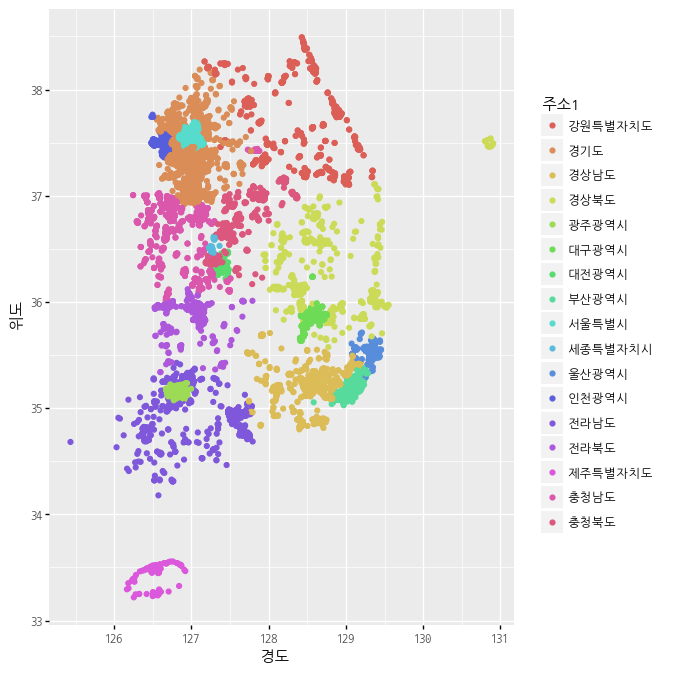

<ggplot: (106570578657)>

In [32]:
(
    ggplot(park_202308_ok, aes('경도','위도',color='주소1'))
        +geom_point() # scatter
        +theme(text=element_text(family='NanumGothicCoding'), figure_size=(6,8)) # 한글 깨짐 방지
)

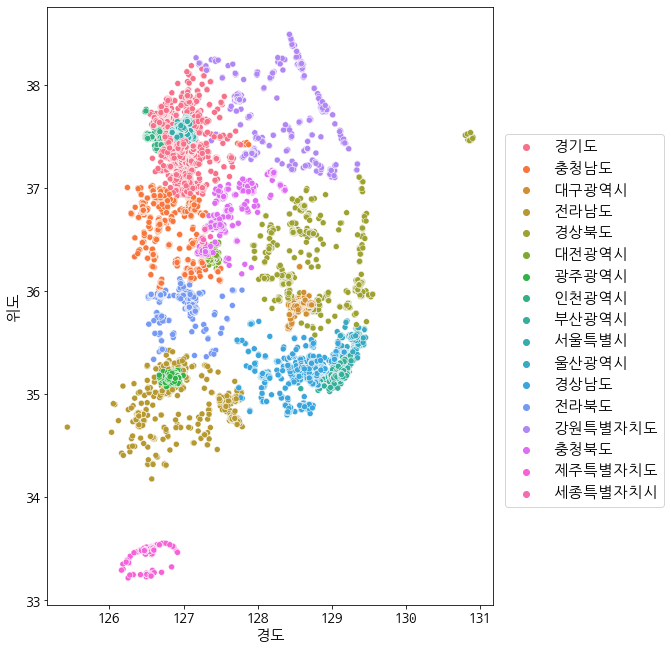

In [33]:
plt.figure(figsize=(8,11))
sns.scatterplot(data=park_202308_ok,x='경도',y='위도',hue='주소1') # seaborn 시각화. hue=color
plt.legend(loc=1, bbox_to_anchor=(1.4,0.8))
plt.show()

공원 구분별 분포

In [34]:
park_202308_ok

관리번호             공원명   공원구분                소재지도로명주소  \
0      41390-00084            승지공원   근린공원        경기도 시흥시 능곡중앙로 85   
1      41570-00059  고촌어린이19(수기1공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1249   
2      41570-00060  고촌어린이20(수기2공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1260   
3      41570-00061  고촌어린이21(수기3공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1268   
4      41570-00063          항공소공원1    소공원  경기도 김포시 대곶면 대벽리 산66-56   
...            ...             ...    ...                     ...   
18213  11500-00044             꿈돌이  어린이공원    서울특별시 강서구 화곡동 24-128   
18214  11500-00045             소나무  어린이공원     서울특별시 강서구 화곡동 29-31   
18215  11500-00046              산새  어린이공원       서울특별시 강서구 화곡동 772   
18216  11500-00047              박장  어린이공원     서울특별시 강서구 화곡동 56-25   
18217  11500-00048              참새  어린이공원    서울특별시 강서구 화곡동 56-638   

                      소재지지번주소         위도          경도     공원면적          전화번호  \
0             경기도 시흥시 능곡동 552  37.371378  126.813132  10842.0  031-310-3869   
1        경기도 김포시 고촌읍 신곡리 1249  37.600127  126.767372   1715.0  031-980-5627   
2        경기도 김포시 고촌읍 신곡리 1260  37.596805  126.770145   1522.0  031-980-5627   
3        경기도 김포시 고촌읍 신곡리 1268  37.596252  126.767048   1567.0  031-980-5627   
4      경기도 김포시 대곶면 대벽리 산66-56  37.617583  126.580436   1968.0  031-980-2344   
...                       ...        ...         ...      ...           ...   
18213    서울특별시 강서구 화곡동 24-128  37.546097  126.845352   1507.0  02-2600-4202   
18214     서울특별시 강서구 화곡동 29-31  37.547058  126.847807    942.0  02-2600-4202   
18215       서울특별시 강서구 화곡동 772  37.546268  126.850385    539.0  02-2600-4202   
18216     서울특별시 강서구 화곡동 56-25  37.540768  126.849087    929.0  02-2600-4202   
18217    서울특별시 강서구 화곡동 56-638  37.539725  126.847003    256.0  02-2600-4202   

          데이터기준일자   제공기관코드      제공기관명    공원면적비율    주소1  주소2    주소3     주소4  
0      2022-11-28  4010000    경기도 시흥시  1.041249    경기도  시흥시  능곡중앙로      85  
1      2022-10-18  4090000    경기도 김포시  0.414126    경기도  김포시    고촌읍     신곡리  
2      2022-10-18  4090000    경기도 김포시  0.390128    경기도  김포시    고촌읍     신곡리  
3      2022-10-18  4090000    경기도 김포시  0.395854    경기도  김포시    고촌읍     신곡리  
4      2022-10-18  4090000    경기도 김포시  0.443621    경기도  김포시    대곶면     대벽리  
...           ...      ...        ...       ...    ...  ...    ...     ...  
18213  2023-03-10  3150000  서울특별시 강서구  0.388201  서울특별시  강서구    화곡동  24-128  
18214  2023-03-10  3150000  서울특별시 강서구  0.306920  서울특별시  강서구    화곡동   29-31  
18215  2023-03-10  3150000  서울특별시 강서구  0.232164  서울특별시  강서구    화곡동     772  
18216  2023-03-10  3150000  서울특별시 강서구  0.304795  서울특별시  강서구    화곡동   56-25  
18217  2023-03-10  3150000  서울특별시 강서구  0.160000  서울특별시  강서구    화곡동  56-638  

[18214 rows x 17 columns]

In [35]:
park_202308_ok.공원구분.value_counts()

어린이공원       9413
근린공원        4042
소공원         2854
기타           569
문화공원         407
수변공원         341
체육공원         259
역사공원         195
마을마당          49
묘지공원          39
기타공원          30
도시농업공원         7
도시자연공원구역       2
주제공원           2
도시자연공원         2
가로공원           1
어린인공원          1
공공공지           1
Name: 공원구분, dtype: int64

In [36]:
# df.loc[행,열]
# 공원구분 요소 이름 바꿈.
park_202308_ok.loc[park_202308_ok.공원구분=='어린인공원', '공원구분']='어린이공원'
park_202308_ok.loc[park_202308_ok.공원구분=='도시자연공원구역', '공원구분']='도시자연공원'
park_202308_ok.loc[park_202308_ok.공원구분 == '기타공원', '공원구분'] = '기타'


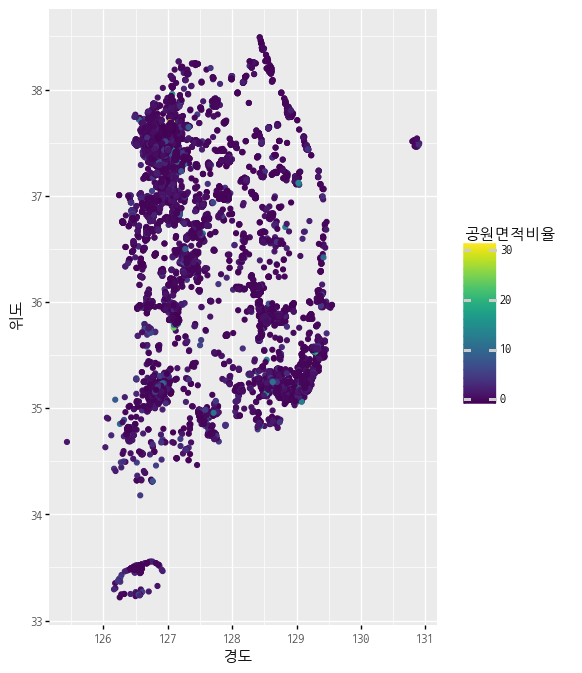

<ggplot: (106573334269)>

In [37]:
(
    ggplot(park_202308_ok, aes(x='경도', y='위도', color='공원면적비율'))
        + geom_point() # scatter
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(5, 8))
)

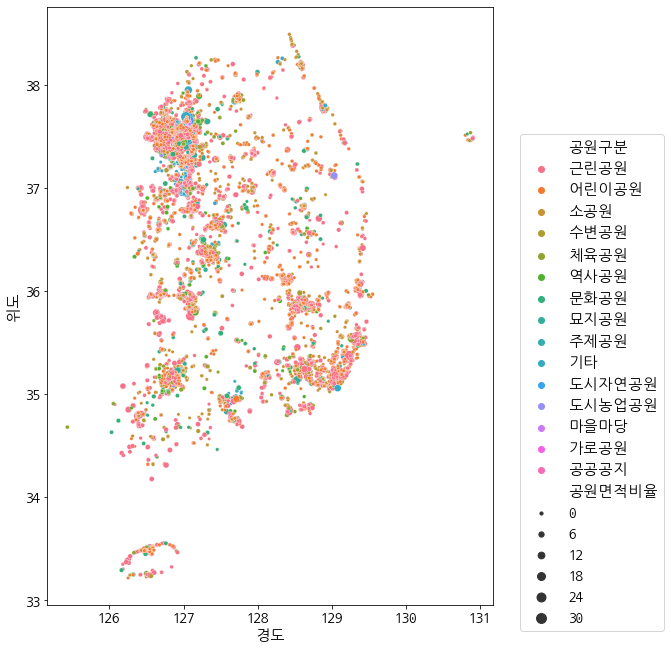

In [38]:
plt.figure(figsize=(8, 11))
sns.scatterplot(data=park_202308_ok, x='경도', y='위도', hue='공원구분', size='공원면적비율', sizes=(10,100)) # s : 개구리알
plt.legend(loc=1, bbox_to_anchor=(1.4, 0.8)) # legend: 범례 위치(1~5까지 있음) / bbox_to_anchor: 범례를 지도 밖으로 보낸다.
plt.show()

어린이공원을 제외한 공원 분포 현황

In [39]:
park_202308_ok[park_202308_ok.공원구분!='어린이공원']

관리번호            공원명  공원구분                  소재지도로명주소  \
0      41390-00084           승지공원  근린공원          경기도 시흥시 능곡중앙로 85   
4      41570-00063         항공소공원1   소공원    경기도 김포시 대곶면 대벽리 산66-56   
6      41570-00065  신곡노을공원(고촌31호)  근린공원      경기도 김포시 고촌읍 신곡리 1106   
7      41570-00067          양산근린3  근린공원      경기도 김포시 양촌읍 학운리 3021   
8      41570-00068          양산근린4  근린공원      경기도 김포시 양촌읍 학운리 3085   
...            ...            ...   ...                       ...   
18192  50130-00001          월라봉공원  근린공원   제주특별자치도 서귀포시 월라봉로 76-40   
18194  50130-00003          삼매봉공원  근린공원    제주특별자치도 서귀포시 서홍동 820-1   
18195  50130-00004           새섬공원  수변공원      제주특별자치도 서귀포시 서귀동 산 1   
18196  50130-00005           식산공원  근린공원  제주특별자치도 서귀포시 성산읍 오조리 314   
18197  50130-00006           중문공원  근린공원   제주특별자치도 서귀포시 중문동 2200-2   

                        소재지지번주소         위도          경도      공원면적  \
0               경기도 시흥시 능곡동 552  37.371378  126.813132   10842.0   
4        경기도 김포시 대곶면 대벽리 산66-56  37.617583  126.580436    1968.0   
6          경기도 김포시 고촌읍 신곡리 1106  37.604136  126.772688   12881.0   
7          경기도 김포시 양촌읍 학운리 3021  37.616571  126.625777   10053.0   
8          경기도 김포시 양촌읍 학운리 3085  37.611614  126.623112   11694.0   
...                         ...        ...         ...       ...   
18192   제주특별자치도 서귀포시 신효동 1192-5  33.270519  126.604565  285946.0   
18194    제주특별자치도 서귀포시 서홍동 820-1  33.243883  126.547508  626362.0   
18195      제주특별자치도 서귀포시 서귀동 산 1  33.236820  126.562841  104137.0   
18196  제주특별자치도 서귀포시 성산읍 오조리 314  33.465822  126.919471   54462.0   
18197   제주특별자치도 서귀포시 중문동 2200-2  33.249929  126.419358   67990.0   

               전화번호     데이터기준일자   제공기관코드         제공기관명    공원면적비율      주소1  \
0      031-310-3869  2022-11-28  4010000       경기도 시흥시  1.041249      경기도   
4      031-980-2344  2022-10-18  4090000       경기도 김포시  0.443621      경기도   
6      031-980-5627  2022-10-18  4090000       경기도 김포시  1.134945      경기도   
7      031-980-5627  2022-10-18  4090000       경기도 김포시  1.002646      경기도   
8      031-980-5627  2022-10-18  4090000       경기도 김포시  1.081388      경기도   
...             ...         ...      ...           ...       ...      ...   
18192  064-760-3192  2022-12-15  6520000  제주특별자치도 서귀포시  5.347392  제주특별자치도   
18194  064-760-3192  2022-12-15  6520000  제주특별자치도 서귀포시  7.914304  제주특별자치도   
18195  064-760-3192  2022-12-15  6520000  제주특별자치도 서귀포시  3.227026  제주특별자치도   
18196  064-760-3192  2022-12-15  6520000  제주특별자치도 서귀포시  2.333709  제주특별자치도   
18197  064-760-3192  2022-12-15  6520000  제주특별자치도 서귀포시  2.607489  제주특별자치도   

        주소2    주소3     주소4  
0       시흥시  능곡중앙로      85  
4       김포시    대곶면     대벽리  
6       김포시    고촌읍     신곡리  
7       김포시    양촌읍     학운리  
8       김포시    양촌읍     학운리  
...     ...    ...     ...  
18192  서귀포시   월라봉로   76-40  
18194  서귀포시    서홍동   820-1  
18195  서귀포시    서귀동       산  
18196  서귀포시    성산읍     오조리  
18197  서귀포시    중문동  2200-2  

[8800 rows x 17 columns]

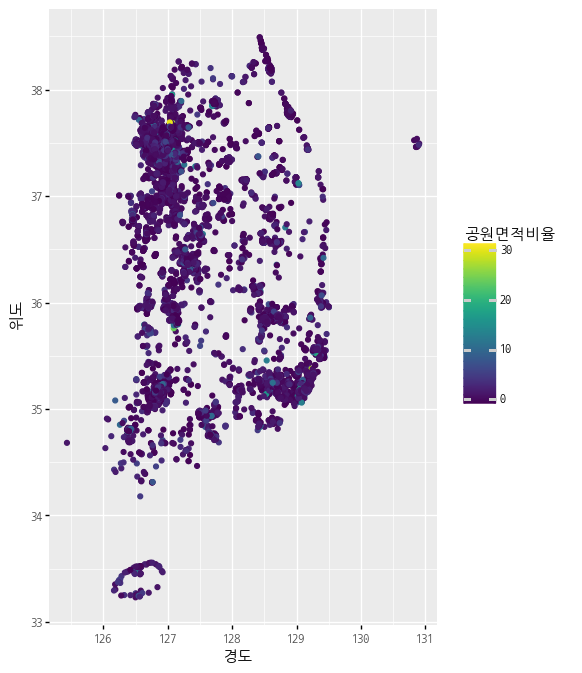

<ggplot: (106574084458)>

In [40]:
(
    ggplot(park_202308_ok[park_202308_ok.공원구분!='어린이공원'], 
           aes(x='경도', y='위도', color='공원면적비율'))
        + geom_point() # scatter
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(5, 8))
)

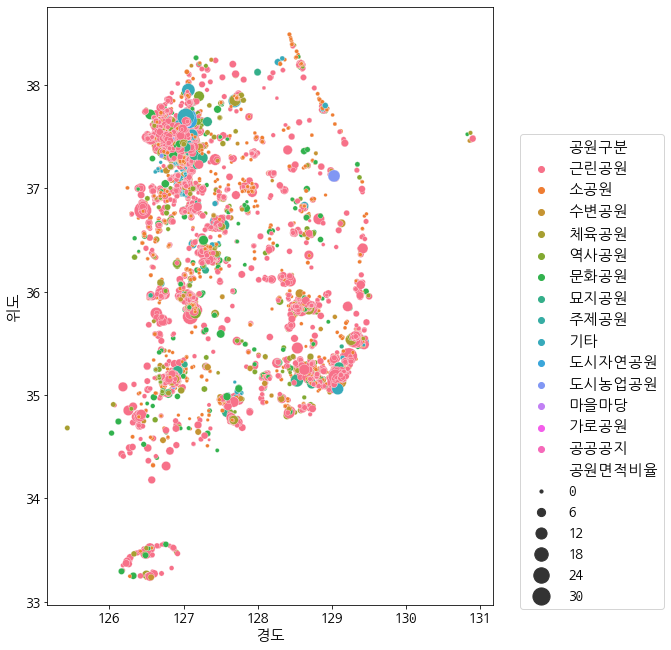

In [41]:
plt.figure(figsize=(8, 11))
sns.scatterplot(data=park_202308_ok[park_202308_ok.공원구분!='어린이공원'], x='경도', y='위도', 
                hue='공원구분', size='공원면적비율', sizes=(10,300)) # s : 개구리알
plt.legend(loc=1, bbox_to_anchor=(1.4, 0.8)) # legend: 범례 위치(1~5까지 있음) / bbox_to_anchor: 범례를 지도 밖으로 보낸다.
plt.show()

시도별 공원 비율

In [42]:
# value_counts() : 
# value_counts(normalize=True) : 전체에 대한 비율 계산
# ascending=True / 
# park_202308_ok.주소1.value_counts(normalize=True, ascending=True)
park_sum= pd.DataFrame(park_202308_ok.주소1.value_counts()).reset_index()
park_sum.columns=['시도','개수']
park_sum

시도    개수
0       경기도  4438
1     서울특별시  1939
2      충청남도  1681
3      경상남도  1223
4   강원특별자치도  1215
5      전라남도  1048
6      경상북도  1014
7     광주광역시   889
8      충청북도   788
9     인천광역시   728
10    부산광역시   693
11     전라북도   674
12    대구광역시   644
13    울산광역시   469
14    대전광역시   449
15  제주특별자치도   252
16  세종특별자치시    70

In [43]:
# pd.DataFrame : 데이터프레임 만들기
park_per= pd.DataFrame(park_202308_ok.주소1.value_counts(normalize=True)).reset_index()
park_per.columns=['시도','비율']

park_per

시도        비율
0       경기도  0.243659
1     서울특별시  0.106457
2      충청남도  0.092292
3      경상남도  0.067146
4   강원특별자치도  0.066707
5      전라남도  0.057538
6      경상북도  0.055671
7     광주광역시  0.048809
8      충청북도  0.043263
9     인천광역시  0.039969
10    부산광역시  0.038048
11     전라북도  0.037005
12    대구광역시  0.035357
13    울산광역시  0.025749
14    대전광역시  0.024651
15  제주특별자치도  0.013836
16  세종특별자치시  0.003843

In [51]:
# 시도별 공원 개수와 비율 데이터를 병합한다.

# 방법1 merge(park_per, left_index=True, right_index=True) : 병합 기준을 열이 아니라 인덱스로.
# .reset_index() : 인덱스를 열로 빼냄.
# park_sido=park_sum.merge(park_per, left_index=True, right_index=True).reset_index()
# park_sido.columns = ['시도', '합계', '비율']
# park_sido

In [45]:
# 방법2 열로 병합(기본)
park_sido=park_sum.merge(park_per, left_on='시도', right_on='시도') 
# park_sido.sort_values('시도', inplace=True) # inplace=True : 바로반영

park_sido

시도    개수        비율
0       경기도  4438  0.243659
1     서울특별시  1939  0.106457
2      충청남도  1681  0.092292
3      경상남도  1223  0.067146
4   강원특별자치도  1215  0.066707
5      전라남도  1048  0.057538
6      경상북도  1014  0.055671
7     광주광역시   889  0.048809
8      충청북도   788  0.043263
9     인천광역시   728  0.039969
10    부산광역시   693  0.038048
11     전라북도   674  0.037005
12    대구광역시   644  0.035357
13    울산광역시   469  0.025749
14    대전광역시   449  0.024651
15  제주특별자치도   252  0.013836
16  세종특별자치시    70  0.003843

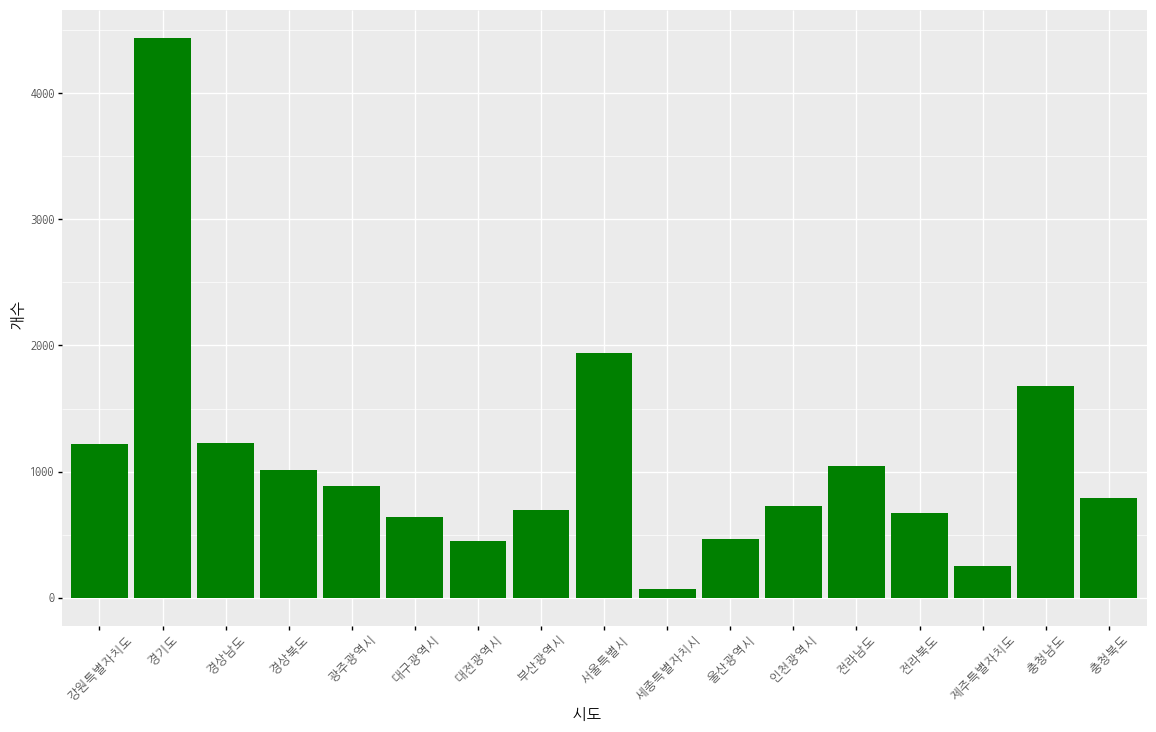

<ggplot: (-9223371930281614890)>

In [46]:
# plotnine 패키지 데이터 시각화 라이브러리 중 하나인 ggplot2에서 사용되는 코드
(
    ggplot(park_sido, aes(x='시도', y='개수'))
    # "geom_bar"는 막대 그래프를 생성
    # stat='identity': "stat" 매개변수는 통계 연산을 지정합니다. "identity"로 설정되어 있으므로 막대 그래프는 데이터의 원래 값을 사용하여 그립니다. 
        # 다시 말해, 데이터에서 주어진 값을 직접 사용하여 막대를 그립니다.
    # position='dodge': "position" 매개변수는 막대의 위치를 지정합니다. "dodge"로 설정되어 있으므로 막대들이 서로 겹치지 않고 옆으로 이동한 형태의 그래프가 생성됩니다.    
        + geom_bar(stat='identity', position='dodge', fill='green')
        + theme(text=element_text(family='NanumGothicCoding'), # 텍스트의 폰트를 설정
                figure_size=(14,8), axis_text_x=element_text(rotation=45))
)

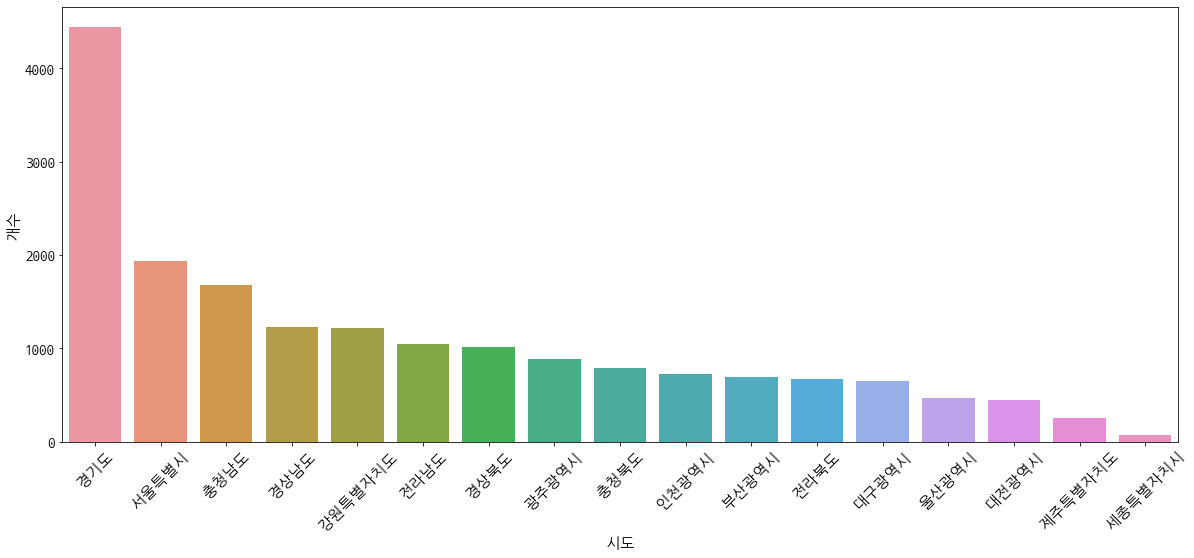

In [47]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=park_sido, x='시도', y='개수') # 막대 그래프(bar plot)를 생성
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [48]:
# https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-order-plot-series.html
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

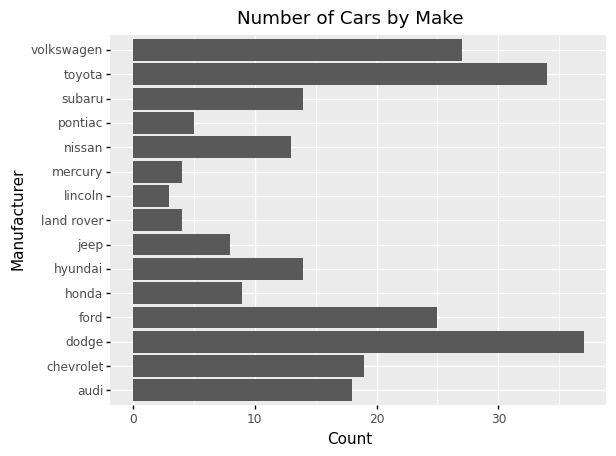

<ggplot: (106577548180)>

In [58]:
(ggplot(mpg)
 + aes(x='manufacturer')
 + geom_bar(size=20)
 + coord_flip() # 세로 막대 그래프를 만든다.
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)


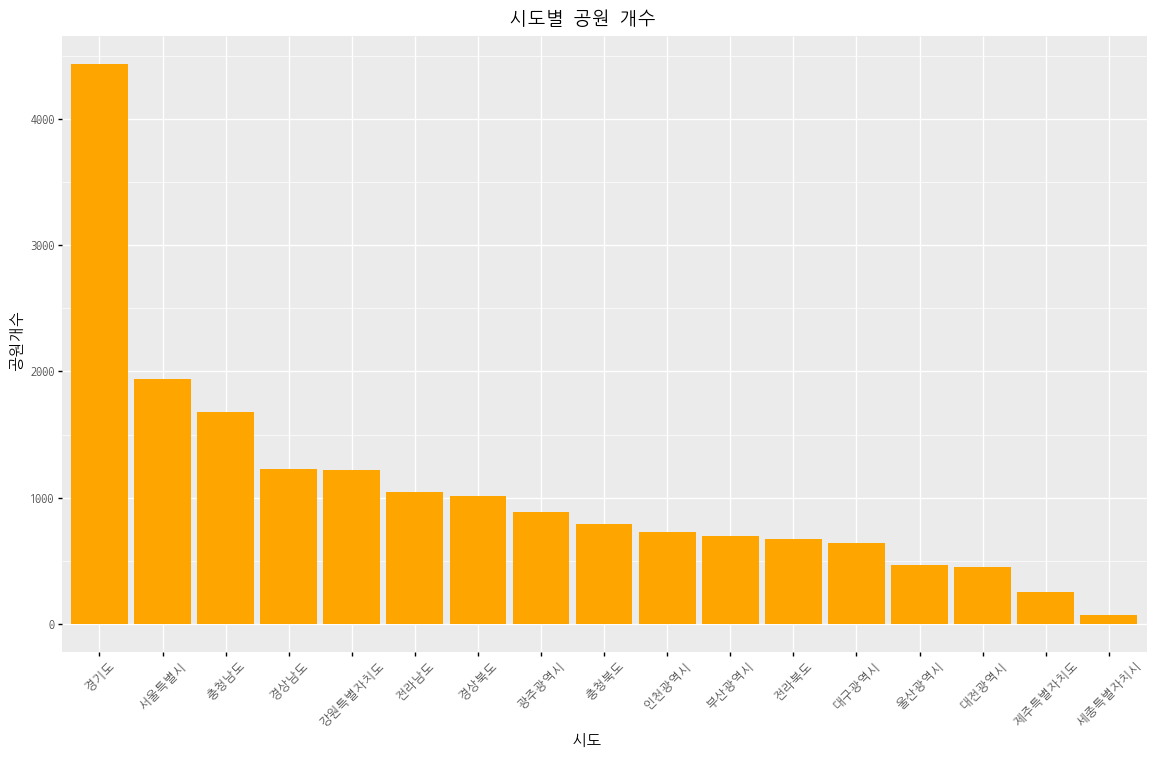

<ggplot: (106574129037)>

In [57]:
# 공식 사이트
park_list = park_202308_ok['주소1'].value_counts().index.tolist()
parkList = pd.Categorical(park_202308_ok['주소1'], categories=park_list)

park_202308_ok = park_202308_ok.assign(공원목록 = parkList)
# park_202308_ok

(ggplot(park_202308_ok)
 + aes(x='공원목록')
 + geom_bar(size=20, fill='orange')
 + theme(text=element_text(family='NanumGothicCoding'), # 텍스트의 폰트를 설정
        figure_size=(14,8), axis_text_x=element_text(rotation=45))
 + labs(y='공원개수', x='시도', title='시도별 공원 개수 ')
)

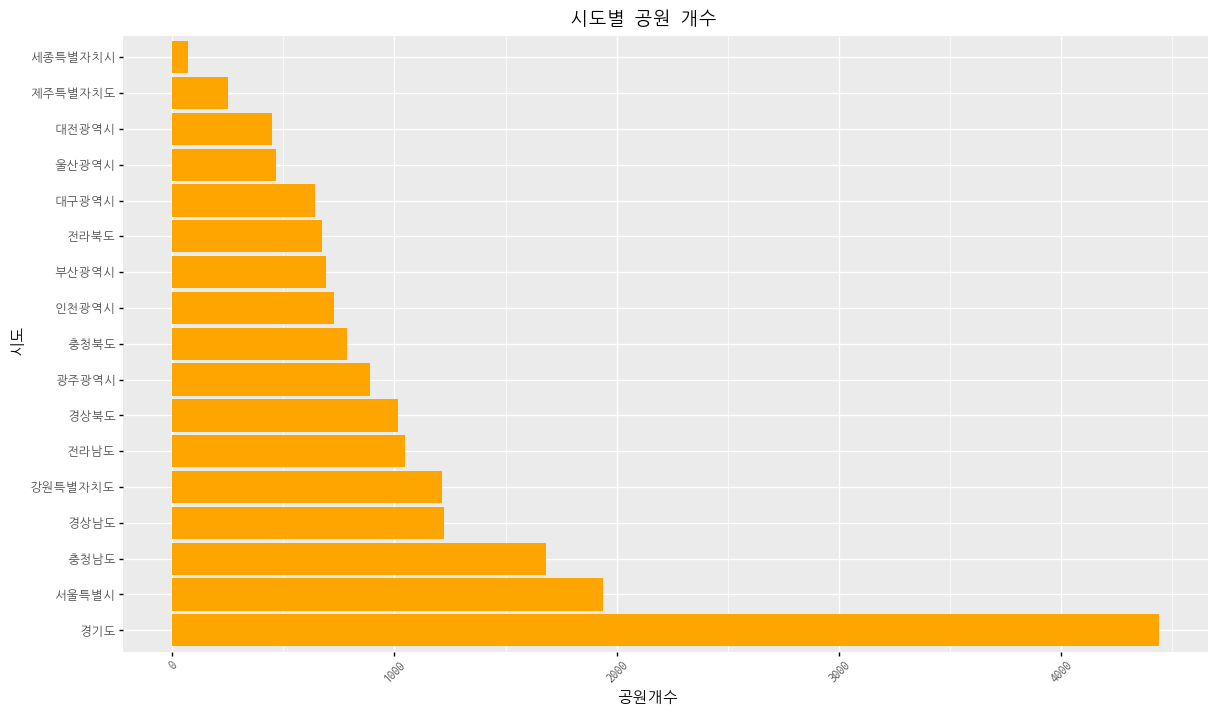

<ggplot: (-9223371930278826559)>

In [59]:
(ggplot(park_202308_ok)
 + aes(x='공원목록')
 + geom_bar(size=20, fill='orange')
 + coord_flip() # 차트의 x축 y축을 회전시킨다.
 + theme(text=element_text(family='NanumGothicCoding'), # 텍스트의 폰트를 설정
        figure_size=(14,8), axis_text_x=element_text(rotation=45))
 + labs(y='공원개수', x='시도', title='시도별 공원 개수 ')
)

공원 구분별 counts

In [76]:
# pd.DataFrame() 매개인수로 df를 만듦
park_type = pd.DataFrame(park_202308_ok['공원구분'].value_counts()).reset_index()
park_type.columns=['공원구분', '개수']
park_type 

공원구분    개수
0    어린이공원  9414
1     근린공원  4042
2      소공원  2854
3       기타   599
4     문화공원   407
5     수변공원   341
6     체육공원   259
7     역사공원   195
8     마을마당    49
9     묘지공원    39
10  도시농업공원     7
11  도시자연공원     4
12    주제공원     2
13    가로공원     1
14    공공공지     1

In [69]:
park_202308_ok['공원구분'].value_counts()

어린이공원     9414
근린공원      4042
소공원       2854
기타         599
문화공원       407
수변공원       341
체육공원       259
역사공원       195
마을마당        49
묘지공원        39
도시농업공원       7
도시자연공원       4
주제공원         2
가로공원         1
공공공지         1
Name: 공원구분, dtype: int64

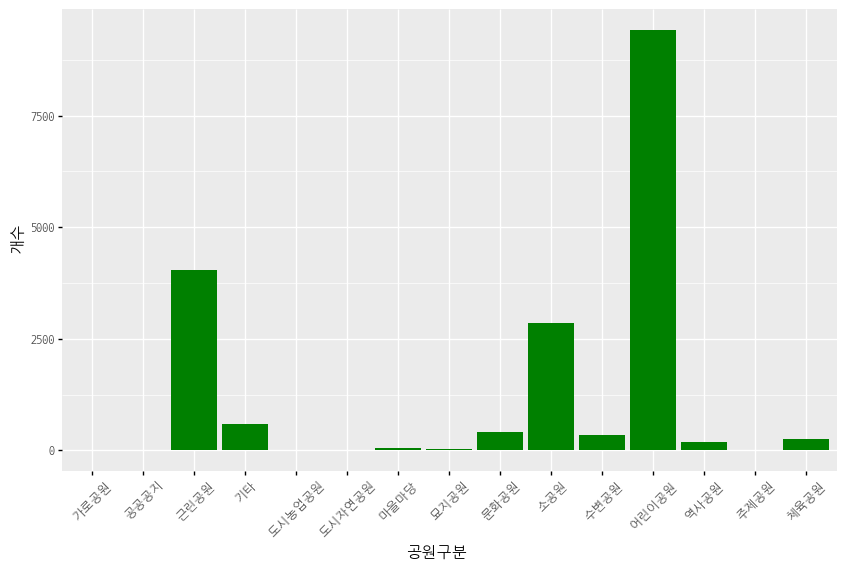

<ggplot: (106581247531)>

In [77]:
(
    ggplot(park_type, aes(x='공원구분', y='개수'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6), 
                axis_text_x=element_text(rotation=45))
)

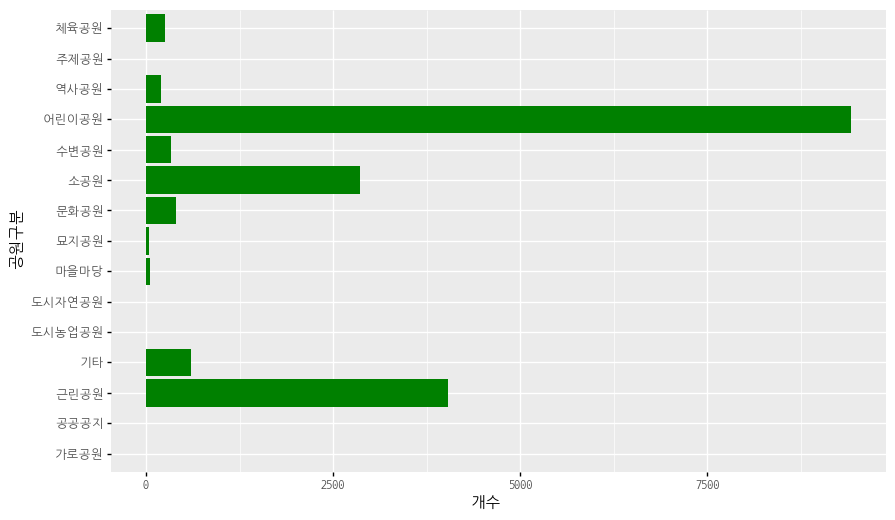

<ggplot: (-9223371930273445937)>

In [80]:
(
    ggplot(park_type, aes(x='공원구분', y='개수'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + coord_flip()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
)

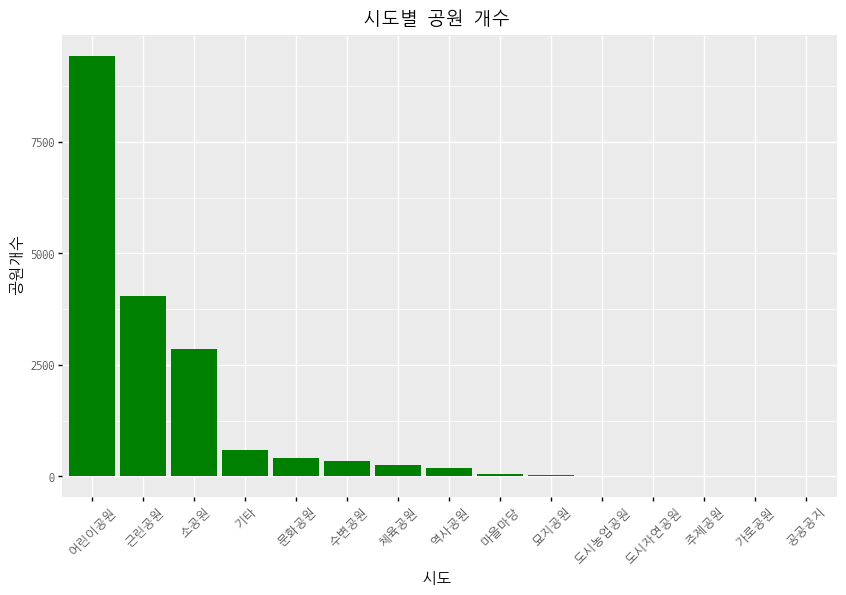

<ggplot: (-9223371930273400439)>

In [81]:
park_list = park_202308_ok['공원구분'].value_counts().index.tolist()
parkList = pd.Categorical(park_202308_ok['공원구분'], categories=park_list)
park_202308_ok = park_202308_ok.assign(공원목록 = parkList)

(ggplot(park_202308_ok)
    + aes(x='공원목록')
    + geom_bar(size=20, fill='green')
    + labs(y='공원개수', x='시도', title='시도별 공원 개수')
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6),
           axis_text_x=element_text(rotation=45))
)

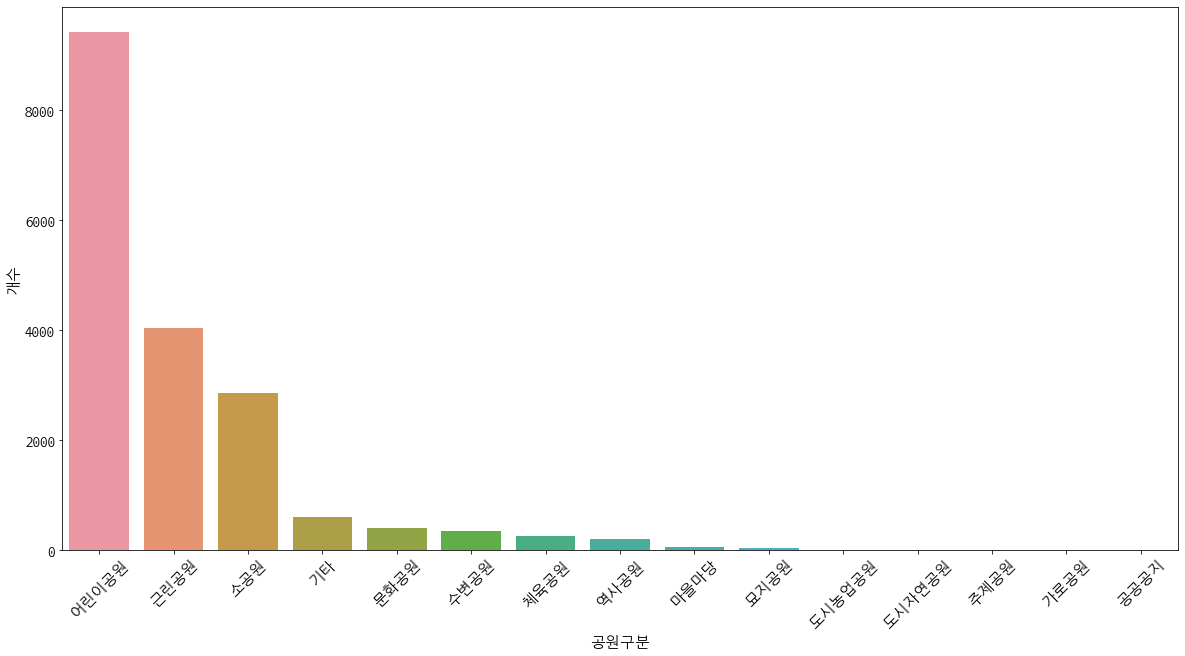

In [83]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=park_type, x='공원구분', y='개수')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

경기도 공원 분포

In [86]:
gyeonggi = park_202308_ok[park_202308_ok['주소1'] == '경기도']
gyeonggi

관리번호                         공원명   공원구분                소재지도로명주소  \
0      41390-00084                        승지공원   근린공원        경기도 시흥시 능곡중앙로 85   
1      41570-00059              고촌어린이19(수기1공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1249   
2      41570-00060              고촌어린이20(수기2공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1260   
3      41570-00061              고촌어린이21(수기3공원)  어린이공원    경기도 김포시 고촌읍 신곡리 1268   
4      41570-00063                      항공소공원1    소공원  경기도 김포시 대곶면 대벽리 산66-56   
...            ...                         ...    ...                     ...   
18091  41220-00216  LG Digital Park일반산업단지 근린공원   근린공원     경기도 평택시 진위면 엘지로 222   
18092  41220-00217                     가곡 근린공원   근린공원     경기도 평택시 진위면 가곡1길 39   
18093  41220-00218           갈곶 근린공원(진위제2산업단지)   근린공원     경기도 평택시 진위면 갈곶리 118   
18094  41220-00219                     견산 근린공원   근린공원     경기도 평택시 진위면 견산리 산9임   
18095  41220-00220             궁2리 근린공원(궁리2지구)   근린공원      경기도 평택시 고덕면 궁리 산32   

                      소재지지번주소         위도          경도     공원면적           전화번호  \
0             경기도 시흥시 능곡동 552  37.371378  126.813132  10842.0   031-310-3869   
1        경기도 김포시 고촌읍 신곡리 1249  37.600127  126.767372   1715.0   031-980-5627   
2        경기도 김포시 고촌읍 신곡리 1260  37.596805  126.770145   1522.0   031-980-5627   
3        경기도 김포시 고촌읍 신곡리 1268  37.596252  126.767048   1567.0   031-980-5627   
4      경기도 김포시 대곶면 대벽리 산66-56  37.617583  126.580436   1968.0   031-980-2344   
...                       ...        ...         ...      ...            ...   
18091     경기도 평택시 진위면 청호리 367  37.128946  127.091568  19939.5  031-8024-4248   
18092    경기도 평택시 진위면 가곡리 70-1  37.112580  127.087180  18268.0  031-8024-4248   
18093     경기도 평택시 진위면 갈곶리 118  37.123960  127.079289  12781.0  031-8024-4248   
18094     경기도 평택시 진위면 견산리 산9임  37.107238  127.077771  53243.0  031-8024-4248   
18095      경기도 평택시 고덕면 궁리 산32  37.022288  127.035645  19409.0  031-8024-4248   

          데이터기준일자   제공기관코드    제공기관명    공원면적비율  주소1  주소2    주소3   주소4   공원목록  
0      2022-11-28  4010000  경기도 시흥시  1.041249  경기도  시흥시  능곡중앙로    85   근린공원  
1      2022-10-18  4090000  경기도 김포시  0.414126  경기도  김포시    고촌읍   신곡리  어린이공원  
2      2022-10-18  4090000  경기도 김포시  0.390128  경기도  김포시    고촌읍   신곡리  어린이공원  
3      2022-10-18  4090000  경기도 김포시  0.395854  경기도  김포시    고촌읍   신곡리  어린이공원  
4      2022-10-18  4090000  경기도 김포시  0.443621  경기도  김포시    대곶면   대벽리    소공원  
...           ...      ...      ...       ...  ...  ...    ...   ...    ...  
18091  2023-02-10  3910000  경기도 평택시  1.412073  경기도  평택시    진위면   엘지로   근린공원  
18092  2023-02-10  3910000  경기도 평택시  1.351592  경기도  평택시    진위면  가곡1길   근린공원  
18093  2023-02-10  3910000  경기도 평택시  1.130531  경기도  평택시    진위면   갈곶리   근린공원  
18094  2023-02-10  3910000  경기도 평택시  2.307444  경기도  평택시    진위면   견산리   근린공원  
18095  2023-02-10  3910000  경기도 평택시  1.393162  경기도  평택시    고덕면    궁리   근린공원  

[4438 rows x 18 columns]

In [89]:
# pd.DataFrame() 매개인수로 df를 만듦
gyeonggi_type = pd.DataFrame(park_202308_ok['공원구분'].value_counts()).reset_index()
gyeonggi_type.columns=['공원구분', '개수']
gyeonggi_type 

공원구분    개수
0    어린이공원  9414
1     근린공원  4042
2      소공원  2854
3       기타   599
4     문화공원   407
5     수변공원   341
6     체육공원   259
7     역사공원   195
8     마을마당    49
9     묘지공원    39
10  도시농업공원     7
11  도시자연공원     4
12    주제공원     2
13    가로공원     1
14    공공공지     1

In [100]:
# lat= park_202308_ok.loc[park_202308_ok['주소1'] == '경기도','위도'].mean() 너무돌아감
# lot= park_202308_ok.loc[park_202308_ok['주소1'] == '경기도','경도'].mean()
# gyeonggi_map = folium.Map(location=[lat, lot], zoom_start=10)
gyeonggi_map = folium.Map(location=[gyeonggi['위도'].mean(), gyeonggi['경도'].mean()], zoom_start=10)
for index,data in gyeonggi.iterrows():
    parkName = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소), max_width=300)
    folium.Marker(location=[data.위도, data.경도], popup=parkName).add_to(gyeonggi_map)

gyeonggi_map 

수원시 공원 분포

In [103]:
suwon = park_202308_ok[park_202308_ok['주소2']=='수원시']
suwon

관리번호 공원명   공원구분                   소재지도로명주소  \
10250  41117-00014  열림   근린공원       경기도 수원시 영통구 웰빙타운로 73   
10251  41117-00015  성죽   근린공원       경기도 수원시 영통구 이의동 1213   
10252  41117-00016  솔내   근린공원       경기도 수원시 영통구 이의동 1215   
10253  41117-00017  연암   근린공원       경기도 수원시 영통구 이의동 1288   
10254  41117-00018  망포   근린공원      경기도 수원시 영통구 망포동 358-5   
...            ...  ..    ...                        ...   
10776  41111-00041  백설  어린이공원  경기도 수원시 장안구 정자천로 133번길 26   
10777  41111-00042  꽃뫼  어린이공원      경기도 수원시 장안구 정자동 883-3   
10779  41111-00043  명인  어린이공원  경기도 수원시 장안구 정자천로 188번길 28   
10780  41111-00044  두견  어린이공원      경기도 수원시 장안구 정자동 887-2   
10781  41111-00045  동신  어린이공원      경기도 수원시 장안구 정자동 880-1   

                     소재지지번주소         위도          경도      공원면적          전화번호  \
10250    경기도 수원시 영통구 이의동1183  37.305557  127.043153  152646.2  031-228-8331   
10251   경기도 수원시 영통구 이의동 1213  37.309474  127.048074   73873.5  031-228-8331   
10252   경기도 수원시 영통구 이의동 1215  37.308184  127.051022   24489.3  031-228-8331   
10253   경기도 수원시 영통구 이의동 1288  37.294502  127.036434  128896.7  031-228-8331   
10254  경기도 수원시 영통구 망포동 358-5  37.242464  127.057720   15990.6  031-228-8331   
...                      ...        ...         ...       ...           ...   
10776  경기도 수원시 장안구 정자동 879-2  37.295134  126.991115    2999.9  031-228-5995   
10777  경기도 수원시 장안구 정자동 883-3  37.292879  126.992097    3100.1  031-228-5995   
10779  경기도 수원시 장안구 정자동 884-5  37.294971  126.995584    2000.1  031-228-5995   
10780  경기도 수원시 장안구 정자동 887-2  37.291502  126.997465    2000.0  031-228-5995   
10781  경기도 수원시 장안구 정자동 880-1  37.294832  126.990111    1600.2  031-228-5995   

          데이터기준일자   제공기관코드    제공기관명    공원면적비율  주소1  주소2  주소3    주소4   공원목록  
10250  2023-06-20  3740000  경기도 수원시  3.906996  경기도  수원시  영통구  웰빙타운로   근린공원  
10251  2023-06-20  3740000  경기도 수원시  2.717968  경기도  수원시  영통구    이의동   근린공원  
10252  2023-06-20  3740000  경기도 수원시  1.564906  경기도  수원시  영통구    이의동   근린공원  
10253  2023-06-20  3740000  경기도 수원시  3.590219  경기도  수원시  영통구    이의동   근린공원  
10254  2023-06-20  3740000  경기도 수원시  1.264539  경기도  수원시  영통구    망포동   근린공원  
...           ...      ...      ...       ...  ...  ...  ...    ...    ...  
10776  2023-06-20  3740000  경기도 수원시  0.547713  경기도  수원시  장안구   정자천로  어린이공원  
10777  2023-06-20  3740000  경기도 수원시  0.556785  경기도  수원시  장안구    정자동  어린이공원  
10779  2023-06-20  3740000  경기도 수원시  0.447225  경기도  수원시  장안구   정자천로  어린이공원  
10780  2023-06-20  3740000  경기도 수원시  0.447214  경기도  수원시  장안구    정자동  어린이공원  
10781  2023-06-20  3740000  경기도 수원시  0.400025  경기도  수원시  장안구    정자동  어린이공원  

[335 rows x 18 columns]

In [106]:
suwon_map = folium.Map(location=[suwon['위도'].mean(), suwon['경도'].mean()], zoom_start=13)
for index,data in suwon.iterrows():
    parkName = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소), max_width=300)
    folium.Marker(location=[data.위도, data.경도], popup=parkName).add_to(suwon_map)

suwon_map 

부산시 공원 분포

In [108]:
busan = park_202308_ok[park_202308_ok['주소1']=='부산광역시']
busan

관리번호     공원명   공원구분                      소재지도로명주소  \
379    26710-00068    옛터공원  어린이공원       부산광역시 기장군 정관읍 방곡리 389-3   
380    26710-00069   꽃보라공원  어린이공원         부산광역시 기장군 정관읍 방곡리 411   
381    26710-00070    산골공원  어린이공원        부산광역시 기장군 정관읍 용수리 1277   
382    26710-00071    어울공원  어린이공원      부산광역시 기장군 정관읍 용수리 1290-3   
383    26710-00072   해오름공원  어린이공원        부산광역시 기장군 정관읍 용수리 1300   
...            ...     ...    ...                           ...   
18168  26350-00010    장지공원   근린공원  부산광역시 해운대구 우동2로32번길 67-5(우동)   
18169  26350-00011  반여제3공원   근린공원           부산광역시 해운대구 재송동 산8-1   
18170  26350-00012    희망공원  어린이공원   부산광역시 해운대구 재반로226번길 48(반여동)   
18171  26350-00013    으뜸공원  어린이공원        부산광역시 해운대구 반여동 1594-68   
18172  26350-00014   별천지공원  어린이공원         부산광역시 해운대구 재송동 1160-1   

                            소재지지번주소         위도          경도     공원면적  \
379         부산광역시 기장군 정관읍 방곡리 389-3  35.326479  129.189985   2121.1   
380           부산광역시 기장군 정관읍 방곡리 411  35.323057  129.187416   2449.9   
381          부산광역시 기장군 정관읍 용수리 1277  35.329593  129.181293   2026.5   
382        부산광역시 기장군 정관읍 용수리 1290-3  35.327499  129.179978   1871.8   
383          부산광역시 기장군 정관읍 용수리 1300  35.327279  129.181561   1912.1   
...                             ...        ...         ...      ...   
18168  부산광역시 해운대구 우동2로32번길 67-5(우동)  35.169206  129.151635  29083.0   
18169           부산광역시 해운대구 재송동 산8-1  35.193212  129.122069  30410.0   
18170   부산광역시 해운대구 재반로226번길 48(반여동)  35.197702  129.124686   4241.0   
18171        부산광역시 해운대구 반여동 1594-68  35.199106  129.134420    940.0   
18172         부산광역시 해운대구 재송동 1160-1  35.191583  129.132751   1653.0   

               전화번호     데이터기준일자   제공기관코드       제공기관명    공원면적비율    주소1   주소2  \
379    051-709-4535  2022-11-23  3400000   부산광역시 기장군  0.460554  부산광역시   기장군   
380    051-709-4535  2022-11-23  3400000   부산광역시 기장군  0.494965  부산광역시   기장군   
381    051-709-4535  2022-11-23  3400000   부산광역시 기장군  0.450167  부산광역시   기장군   
382    051-709-4535  2022-11-23  3400000   부산광역시 기장군  0.432643  부산광역시   기장군   
383    051-709-4535  2022-11-23  3400000   부산광역시 기장군  0.437276  부산광역시   기장군   
...             ...         ...      ...         ...       ...    ...   ...   
18168           NaN  2022-11-23  3330000  부산광역시 해운대구  1.705374  부산광역시  해운대구   
18169           NaN  2022-11-23  3330000  부산광역시 해운대구  1.743846  부산광역시  해운대구   
18170           NaN  2022-11-23  3330000  부산광역시 해운대구  0.651230  부산광역시  해운대구   
18171           NaN  2022-11-23  3330000  부산광역시 해운대구  0.306594  부산광역시  해운대구   
18172           NaN  2022-11-23  3330000  부산광역시 해운대구  0.406571  부산광역시  해운대구   

            주소3       주소4   공원목록  
379         정관읍       방곡리  어린이공원  
380         정관읍       방곡리  어린이공원  
381         정관읍       용수리  어린이공원  
382         정관읍       용수리  어린이공원  
383         정관읍       용수리  어린이공원  
...         ...       ...    ...  
18168  우동2로32번길  67-5(우동)   근린공원  
18169       재송동      산8-1   근린공원  
18170  재반로226번길   48(반여동)  어린이공원  
18171       반여동   1594-68  어린이공원  
18172       재송동    1160-1  어린이공원  

[693 rows x 18 columns]

In [126]:
set(busan['주소2'])

{'강서구',
 '금정구',
 '기장군',
 '남구',
 '동구',
 '동래구',
 '부산진구',
 '북구',
 '사상구',
 '사하구',
 '서구',
 '수영구',
 '연제구',
 '영도구',
 '중구',
 '해운대구'}

In [116]:
busan_map = folium.Map(location=[busan['위도'].mean(), busan['경도'].mean()], zoom_start=12)
for index,data in busan.iterrows():
    parkName = folium.Popup('{}: {}'.format(data.공원명, data.소재지도로명주소), max_width=300)
    folium.CircleMarker(location=[data.위도, data.경도], popup=parkName,
                       radius=data.공원면적비율*2, fill_color='white').add_to(busan_map)

busan_map 

경기도 일부 공원만을 정규 표현식을 사용해 추출

In [117]:
import re #  정규 표현식을 사용하기 위해 필요한 모듈을 불러오는 명령
# 텍스트에서 특정 패턴을 검색하거나 추출하기 위해 사용

In [118]:
park_type = r'.*([역사|체육|수변|문화|묘지]공원).*'
gyeonggi_sample = gyeonggi[gyeonggi['공원구분'].str.match(park_type)]
gyeonggi_sample

관리번호                공원명  공원구분                 소재지도로명주소  \
63     41310-00089            사노동체육공원  체육공원         경기도 구리시 왕숙천로 701   
64     41310-00090             인창체육공원  체육공원      경기도 구리시 인창2로27번길 11   
306    41390-00080               해미공원  수변공원                  경기도 시흥시   
307    41390-00081                물비늘  수변공원                  경기도 시흥시   
339    41310-00099               섬말공원  역사공원     경기도 구리시 갈매동 641, 652   
...            ...                ...   ...                      ...   
17975  41290-00013             관문체육공원  체육공원          경기도 과천시 중앙로 294   
17976  41290-00014             문원체육공원  체육공원           경기도 과천시 문원로 56   
18077  41220-00202      용죽 역사공원(용죽지구)  역사공원          경기도 평택시 용이동 660   
18078  41220-00203          원효대사 역사공원  역사공원  경기도 평택시 포승읍 원정리 산109-37   
18079  41220-00204  노와이주단지 체육공원(노와지구)  체육공원     경기도 평택시 팽성읍 노와리 456공   

                       소재지지번주소         위도          경도      공원면적  \
63            경기도 구리시 사노동 37-1  37.635574  127.147145   57479.0   
64          경기도 구리시 인창동 622-28  37.604761  127.129954   10228.0   
306         경기도 시흥시 정왕동 2598-3  37.327156  126.699523   32706.0   
307         경기도 시흥시 정왕동 2609-6  37.320972  126.709546   13750.0   
339       경기도 구리시 갈매동 641, 652  37.627669  127.116962   16046.0   
...                        ...        ...         ...       ...   
17975            경기도 과천시 관문동 3  37.441365  126.996348  176471.0   
17976           경기도 과천시 문원동 20  37.427922  127.003661   36676.0   
18077          경기도 평택시 용이동 660  36.997961  127.127348   36140.4   
18078  경기도 평택시 포승읍 원정리 산109-37  37.004727  126.822483    7131.0   
18079     경기도 평택시 팽성읍 노와리 456공  36.947202  127.090014   18000.6   

                전화번호     데이터기준일자   제공기관코드    제공기관명    공원면적비율  주소1  주소2  \
63      031-550-8775  2022-11-22  3980000  경기도 구리시  2.397478  경기도  구리시   
64      031-550-8775  2022-11-22  3980000  경기도 구리시  1.011336  경기도  구리시   
306     031-310-3863  2022-11-28  4010000  경기도 시흥시  1.808480  경기도  시흥시   
307     031-310-3863  2022-11-28  4010000  경기도 시흥시  1.172604  경기도  시흥시   
339     031-550-2474  2022-11-22  3980000  경기도 구리시  1.266728  경기도  구리시   
...              ...         ...      ...      ...       ...  ...  ...   
17975    02-500-1410  2022-08-01  3970000  경기도 과천시  4.200845  경기도  과천시   
17976    02-500-1410  2022-08-01  3970000  경기도 과천시  1.915098  경기도  과천시   
18077  031-8024-4248  2023-02-10  3910000  경기도 평택시  1.901063  경기도  평택시   
18078  031-8024-4248  2023-02-10  3910000  경기도 평택시  0.844452  경기도  평택시   
18079  031-8024-4248  2023-02-10  3910000  경기도 평택시  1.341663  경기도  평택시   

            주소3   주소4  공원목록  
63         왕숙천로   701  체육공원  
64     인창2로27번길    11  체육공원  
306        None  None  수변공원  
307        None  None  수변공원  
339         갈매동  641,  역사공원  
...         ...   ...   ...  
17975       중앙로   294  체육공원  
17976       문원로    56  체육공원  
18077       용이동   660  역사공원  
18078       포승읍   원정리  역사공원  
18079       팽성읍   노와리  체육공원  

[391 rows x 18 columns]

In [120]:
set(gyeonggi_sample.공원구분)

{'묘지공원', '문화공원', '수변공원', '역사공원', '체육공원'}

In [121]:
# basic Marker
gyeonggi_sample_map = folium.Map(location=[gyeonggi_sample['위도'].mean(), gyeonggi_sample['경도'].mean()], zoom_start=10)
for i in gyeonggi_sample.index:
    parkName = folium.Popup('{} - {}'.format(gyeonggi_sample.loc[i, '공원명'], gyeonggi_sample.loc[i, '소재지도로명주소']), max_width=300)
    folium.Marker(location=[gyeonggi_sample.loc[i, '위도'], gyeonggi_sample.loc[i, '경도']], popup=parkName).add_to(gyeonggi_sample_map)
gyeonggi_sample_map

In [123]:
# CircleMarker
gyeonggi_sample_map = folium.Map(location=[gyeonggi_sample['위도'].mean(), gyeonggi_sample['경도'].mean()], zoom_start=10)
for i in gyeonggi_sample.index:
    parkName = folium.Popup('{} - {}'.format(gyeonggi_sample.loc[i, '공원명'], gyeonggi_sample.loc[i, '소재지도로명주소']), max_width=300)
    folium.CircleMarker(location=[gyeonggi_sample.loc[i, '위도'], gyeonggi_sample.loc[i, '경도']], popup=parkName,
                       radius=gyeonggi_sample.loc[i, '공원면적비율'] * 3, color='red', fill_color='white').add_to(gyeonggi_sample_map)
gyeonggi_sample_map

부산 공원 분포